# Training the Model (Notebook 3 of 4) 

In [1]:
# Import libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics and evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score
from math import sqrt

# Models and utilities
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyClassifier

# Boosting algorithm
import xgboost as xgb

# IPython utilities for better output
from IPython.display import display, HTML

# Font properties for plots
from matplotlib.font_manager import FontProperties

import os


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# load data
data = pd.read_csv('../2_cleaned_data/d_merged_with_labels.csv')
data.head(3)

osm_id  ncc_owned  osm_way_id  house_area  house_peri  house_vert  \
0  35551462          1    35551462          66          34           8   
1  43078229          0    43078229          70          34           4   
2  43078229          0    43078229          70          34           4   

  private    house_lati  NATIONALCA  land_area  land_perim  land_verti  \
0     yes  6.971754e+06  29324493.0      207.0        62.0        12.0   
1      no  6.972089e+06  29416618.0     1261.0       151.0        36.0   
2      no  6.972089e+06  29416618.0     1261.0       151.0        36.0   

    land_longi    land_latit  COUNT  house_long  b2lpercent building_age  
0 -128367.6972  6.971752e+06      1  -128372.04        32.0          NaN  
1 -127157.2719  6.972083e+06      1  -127167.64         6.0          NaN  
2 -127157.2719  6.972083e+06      1  -127167.64         6.0          NaN

### Selecting data where 'building_age' is labelled

In [3]:
# Select only labelled data

index=~data['building_age'].isna()
labelled_data = data[index]
labelled_data.head(5)

osm_id  ncc_owned  osm_way_id  house_area  house_peri  house_vert  \
37   61738758          0    61738758          61          38           8   
88   61738934          0    61738934          53          31           8   
89   61738936          0    61738936          83          39           4   
97   61738958          0    61738958          40          32           6   
103  61738962          0    61738962          49          36           6   

    private    house_lati  NATIONALCA  land_area  land_perim  land_verti  \
37       no  6.971471e+06  29393419.0       69.0        41.0        12.0   
88       no  6.971390e+06  29403117.0      127.0        50.0        12.0   
89       no  6.971303e+06  29399689.0      282.0        78.0        25.0   
97       no  6.972130e+06  29374681.0      102.0        60.0        14.0   
103      no  6.971576e+06  29370838.0      164.0        56.0        10.0   

      land_longi    land_latit  COUNT  house_long  b2lpercent building_age  
37  -127468.5196  6.971467e+06      2  -127469.97        88.0       modern  
88  -127334.2561  6.971393e+06      2  -127334.47        42.0       modern  
89  -127391.7110  6.971309e+06      2  -127392.91        29.0       modern  
97  -127724.8765  6.972138e+06      2  -127723.61        39.0    victorian  
103 -127794.9319  6.971576e+06      1  -127789.88        30.0    victorian

In [4]:
# Show statistical details

labelled_data.describe()

osm_id   ncc_owned    osm_way_id  house_area  house_peri  \
count  2.980000e+02  298.000000  2.980000e+02  298.000000  298.000000   
mean   2.102103e+08    0.137584  2.102103e+08   53.798658   32.271812   
std    1.118100e+08    0.345042  1.118100e+08   28.872174    9.234503   
min    6.173876e+07    0.000000  6.173876e+07   13.000000   16.000000   
25%    2.271999e+08    0.000000  2.271999e+08   36.000000   26.000000   
50%    2.292011e+08    0.000000  2.292011e+08   49.000000   31.000000   
75%    2.301658e+08    0.000000  2.301658e+08   58.000000   38.000000   
max    9.706884e+08    1.000000  9.706884e+08  223.000000   73.000000   

       house_vert    house_lati    NATIONALCA   land_area  land_perim  \
count  298.000000  2.980000e+02  2.980000e+02  298.000000  298.000000   
mean     6.016779  6.971747e+06  3.382535e+07  183.852349   61.916107   
std      2.164075  4.492878e+02  9.859664e+06  167.384892   22.748730   
min      4.000000  6.971109e+06  2.928795e+07   59.000000   38.000000   
25%      4.000000  6.971390e+06  2.937962e+07   95.000000   48.000000   
50%      6.000000  6.971617e+06  2.939643e+07  118.000000   52.000000   
75%      6.000000  6.972012e+06  2.944205e+07  170.750000   64.000000   
max     15.000000  6.972818e+06  6.130103e+07  809.000000  126.000000   

       land_verti     land_longi    land_latit       COUNT     house_long  \
count  298.000000     298.000000  2.980000e+02  298.000000     298.000000   
mean    13.778523 -127463.633439  6.971747e+06    2.026846 -127466.993087   
std      5.730591     412.472247  4.494457e+02    0.700614     408.385614   
min      4.000000 -128855.655500  6.971113e+06    1.000000 -128856.370000   
25%     10.000000 -127671.551825  6.971390e+06    2.000000 -127675.730000   
50%     12.000000 -127461.793400  6.971617e+06    2.000000 -127464.450000   
75%     15.000000 -127190.957600  6.972010e+06    2.000000 -127187.587500   
max     54.000000 -126781.239700  6.972822e+06    5.000000 -126798.120000   

       b2lpercent  
count  298.000000  
mean    38.848993  
std     18.212754  
min      2.000000  
25%     26.000000  
50%     39.000000  
75%     50.000000  
max     98.000000

In [5]:
# Show datatype and sizs of each variable

labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 37 to 3418
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   osm_id        298 non-null    int64  
 1   ncc_owned     298 non-null    int64  
 2   osm_way_id    298 non-null    int64  
 3   house_area    298 non-null    int64  
 4   house_peri    298 non-null    int64  
 5   house_vert    298 non-null    int64  
 6   private       298 non-null    object 
 7   house_lati    298 non-null    float64
 8   NATIONALCA    298 non-null    float64
 9   land_area     298 non-null    float64
 10  land_perim    298 non-null    float64
 11  land_verti    298 non-null    float64
 12  land_longi    298 non-null    float64
 13  land_latit    298 non-null    float64
 14  COUNT         298 non-null    int64  
 15  house_long    298 non-null    float64
 16  b2lpercent    298 non-null    float64
 17  building_age  298 non-null    object 
dtypes: float64(9), int64(7), obj

In [6]:
# View frequency of each building (labelled)

labelled_data['building_age'].value_counts()

inter_war       79
modern          74
victorian       71
post_war        54
21st_century    20
Name: building_age, dtype: int64

### analysis of features

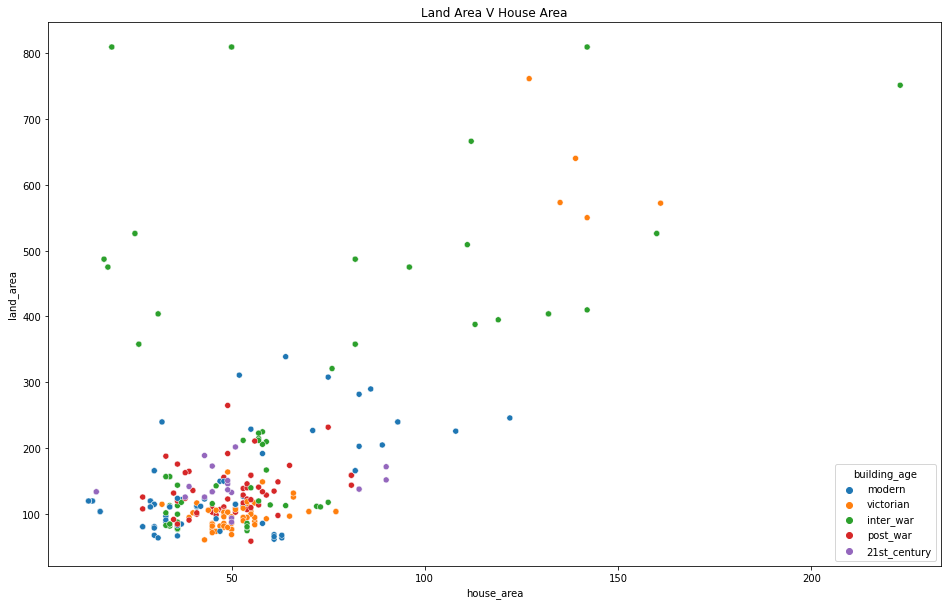

In [7]:
# Plot house_area vs land_area spectrum of building_age

plt.figure(figsize=(16, 10))
sns.scatterplot(x="house_area", y="land_area", hue="building_age", data=labelled_data)

# Add a title
title = 'Land Area V House Area'
plt.title(title)

# Convert the title to a filename-friendly format
safe_title = "".join(c if c.isalnum() else "_" for c in title)

# Save the figure using the title as the filename
plt.savefig(f'../3_plots/b_clusters/{safe_title}.png')

plt.savefig("../3_plots/c_correlation/house area vs land area.png",dpi=300)
plt.show()

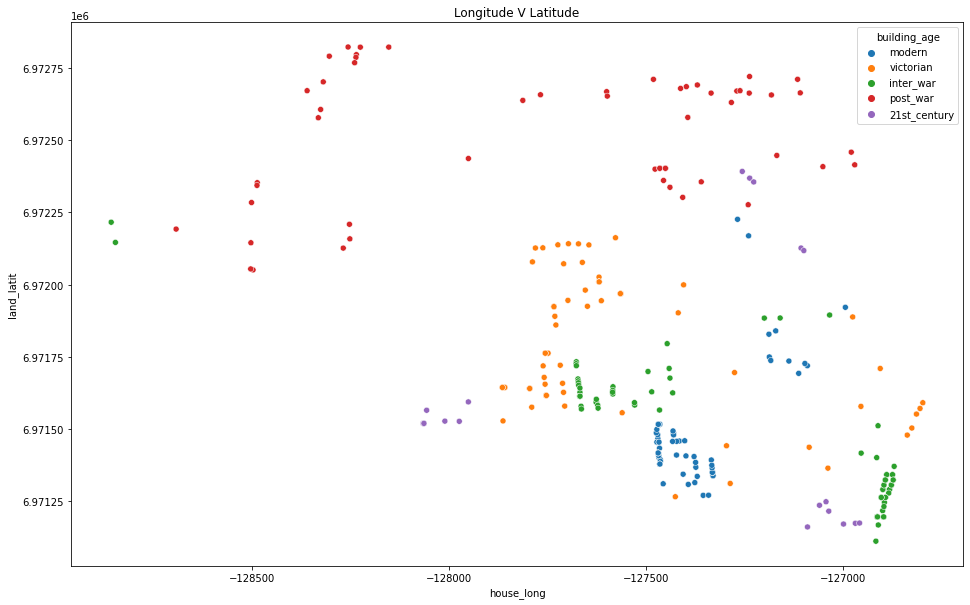

In [8]:
# Plot longitude and latitude

plt.figure(figsize=(16, 10))
sns.scatterplot(x="house_long", y="land_latit", hue="building_age", data=labelled_data)

# Add a title
title = 'Longitude V Latitude'
plt.title(title)

# Convert the title to a filename-friendly format
safe_title = "".join(c if c.isalnum() else "_" for c in title)

# Save the figure using the title as the filename
plt.savefig(f'../3_plots/b_clusters/{safe_title}.png')

plt.savefig("../3_plots/c_correlation/long_v_lat.png",dpi=300)

plt.show()

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_97913/1251983645.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 8))


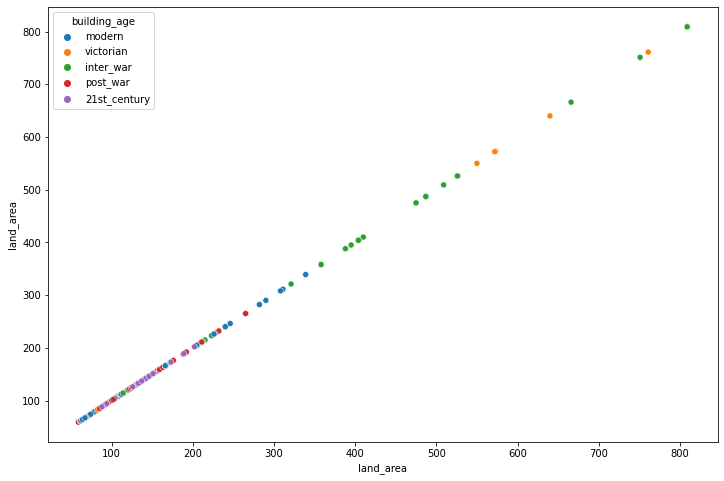

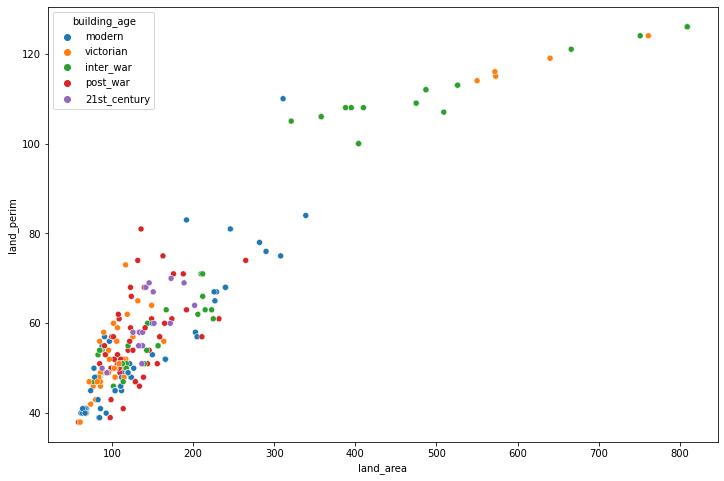

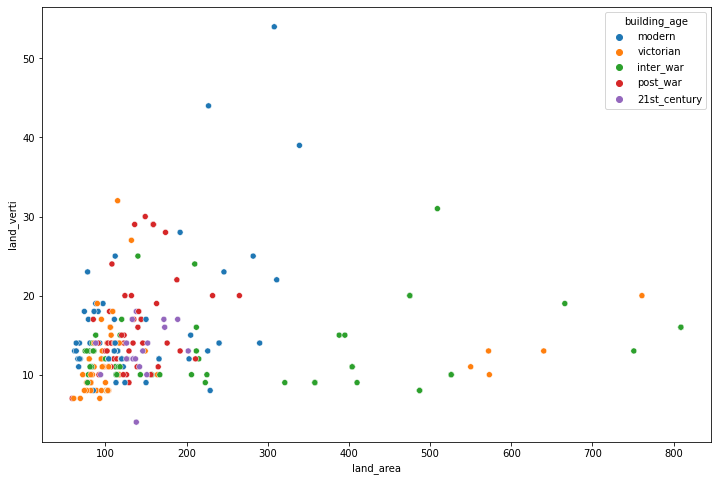

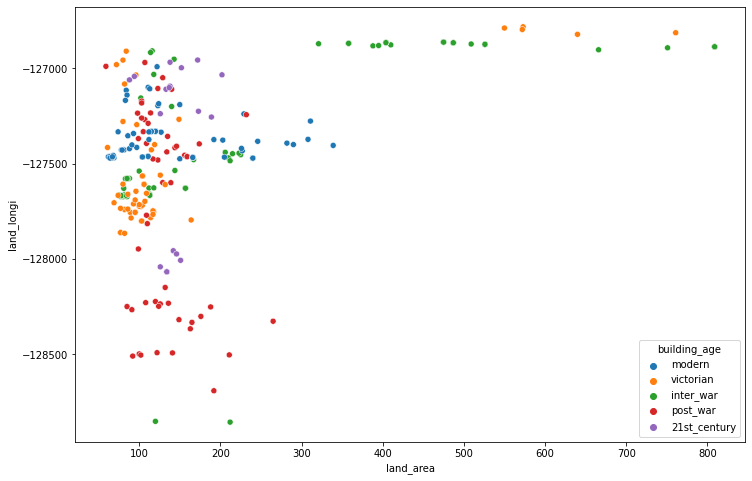

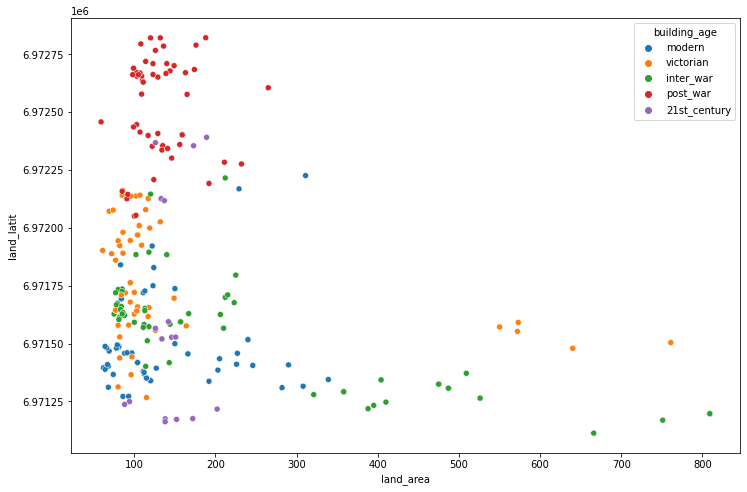

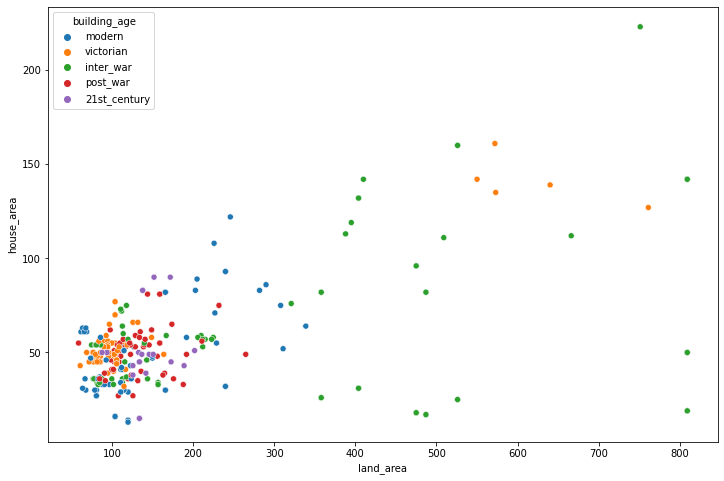

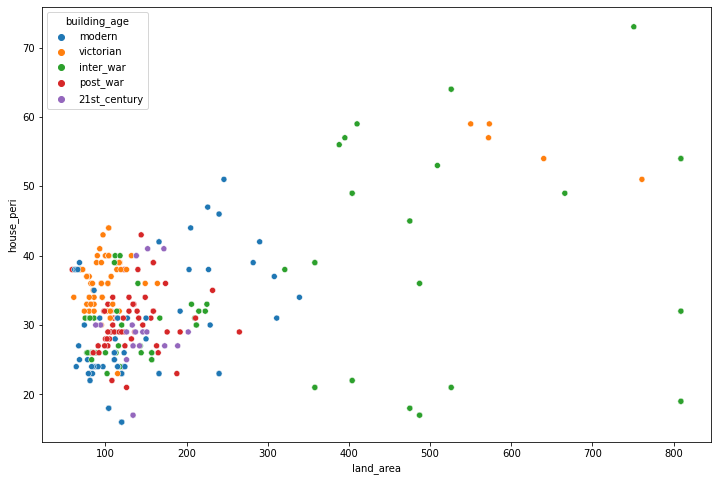

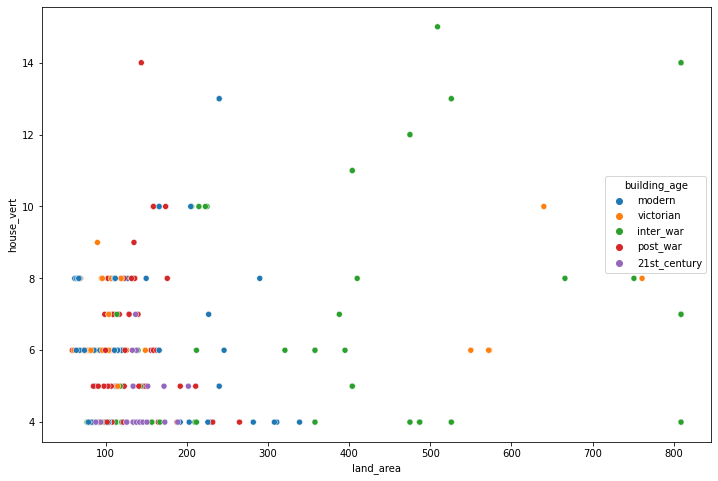

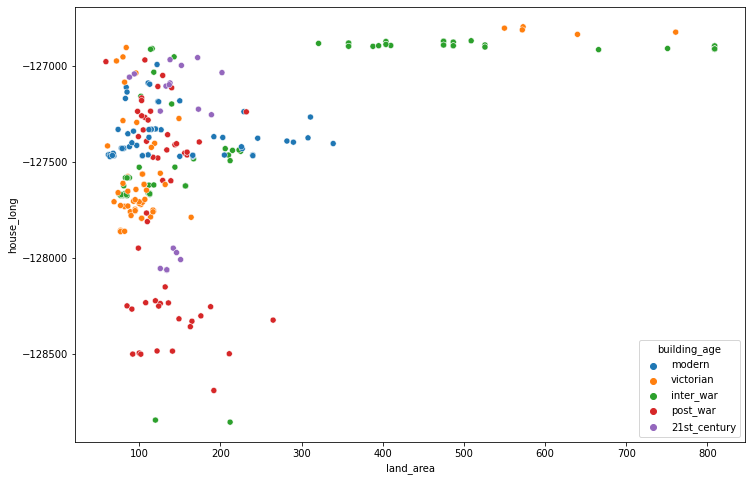

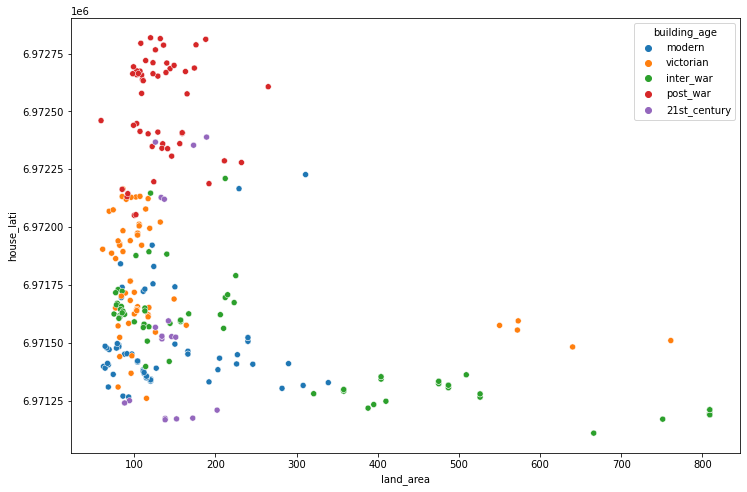

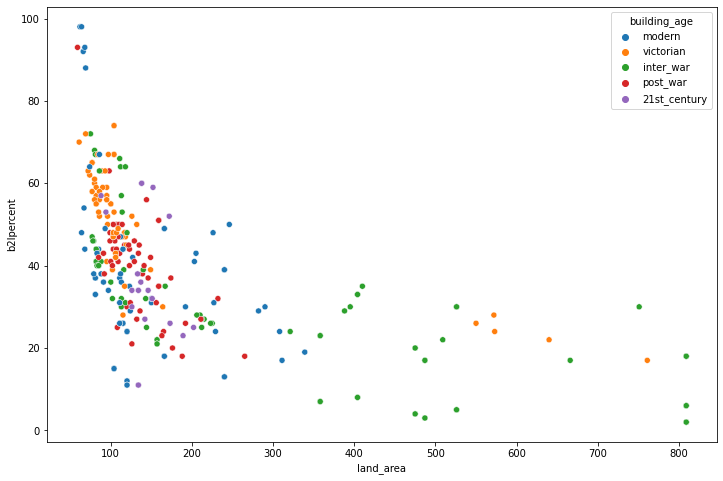

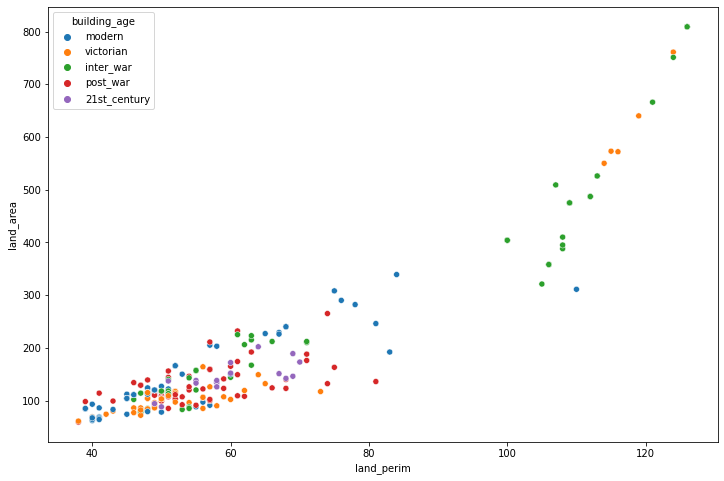

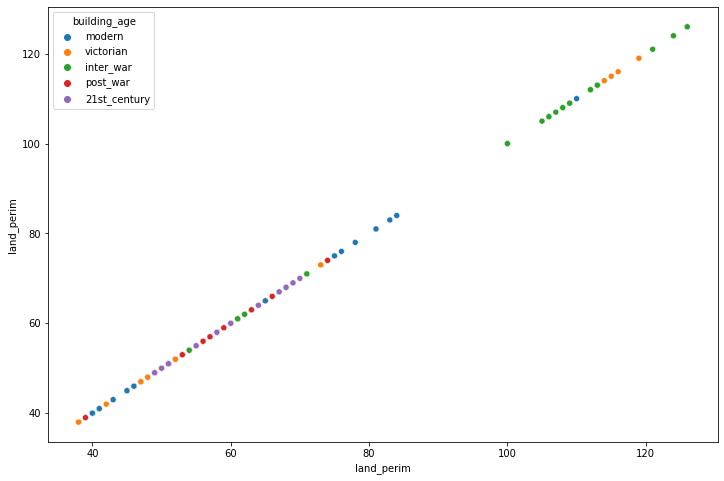

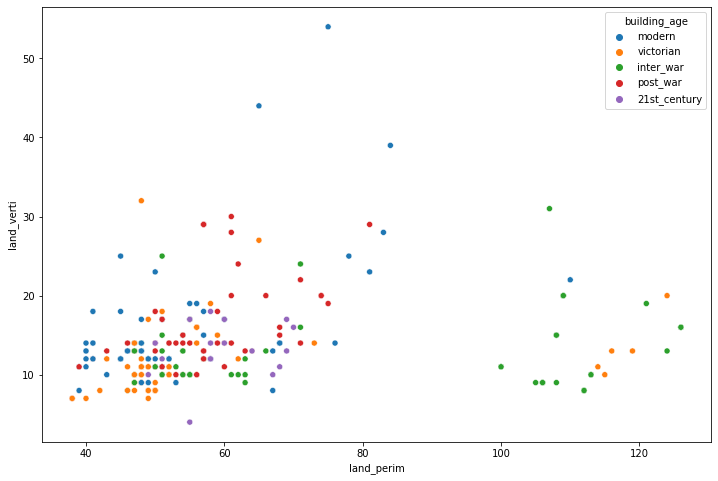

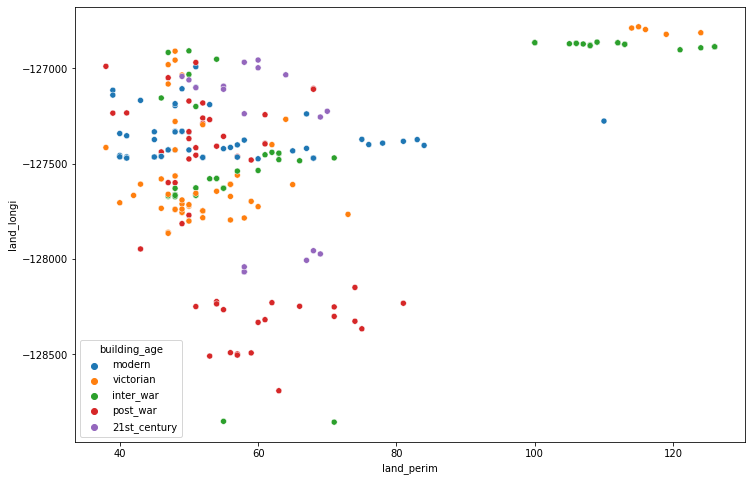

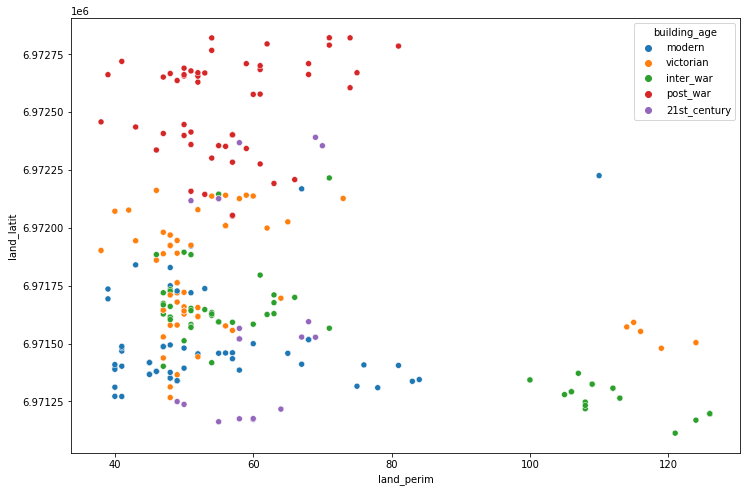

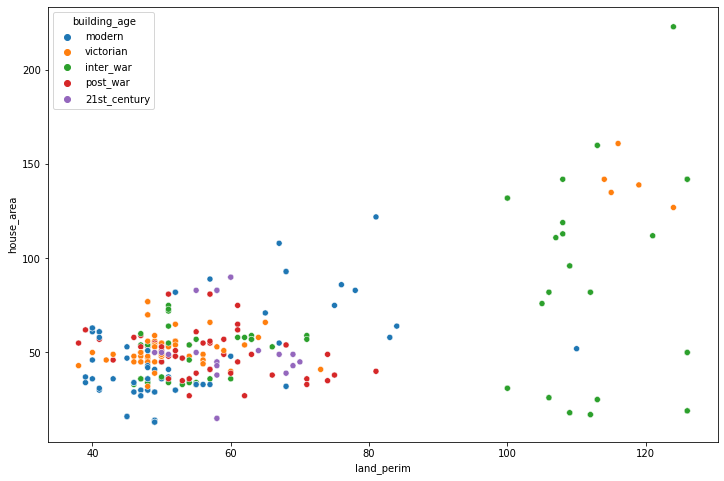

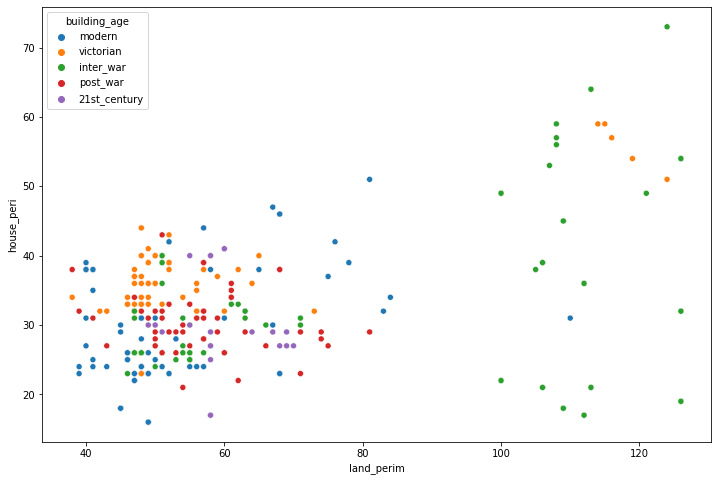

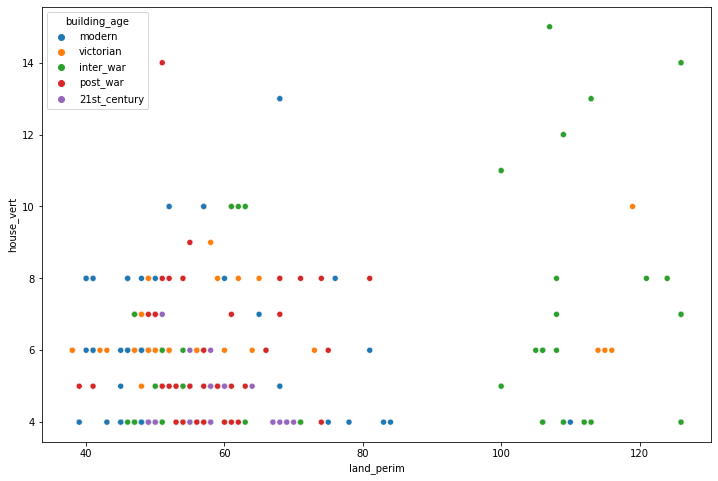

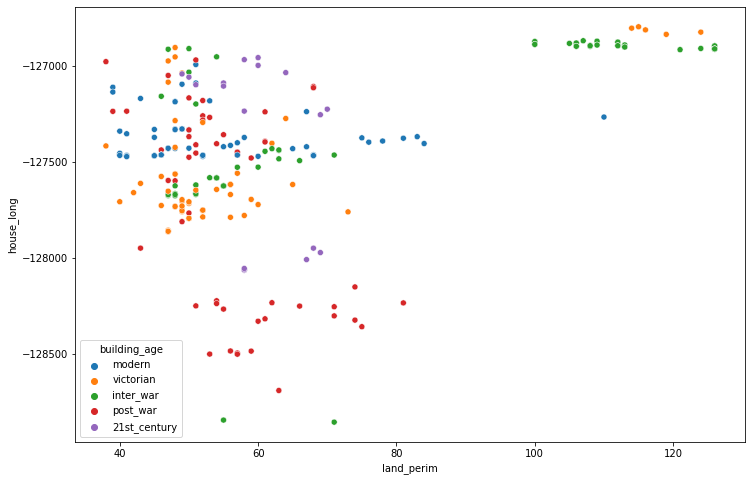

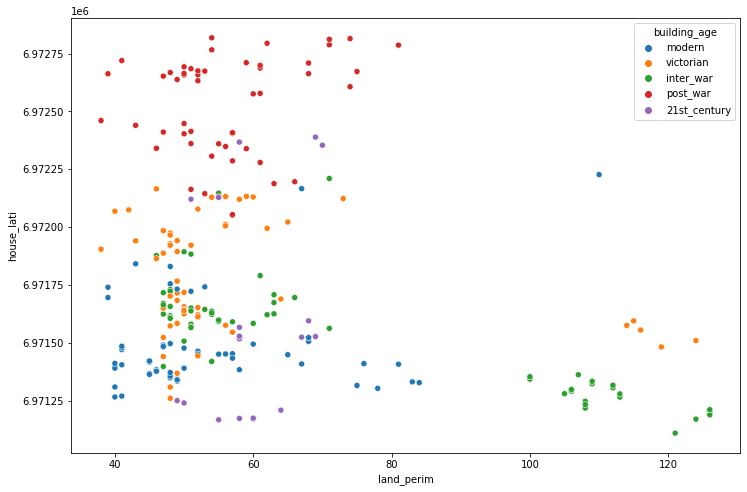

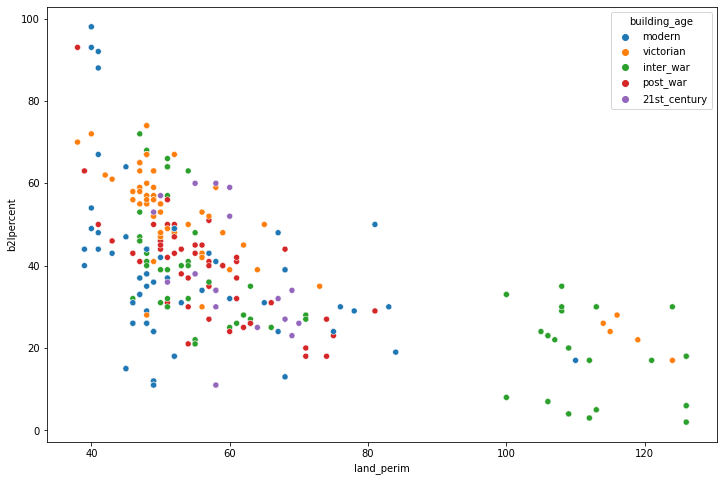

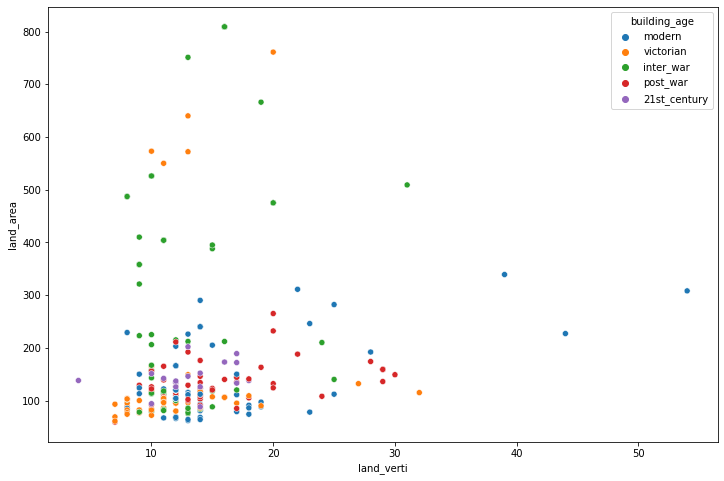

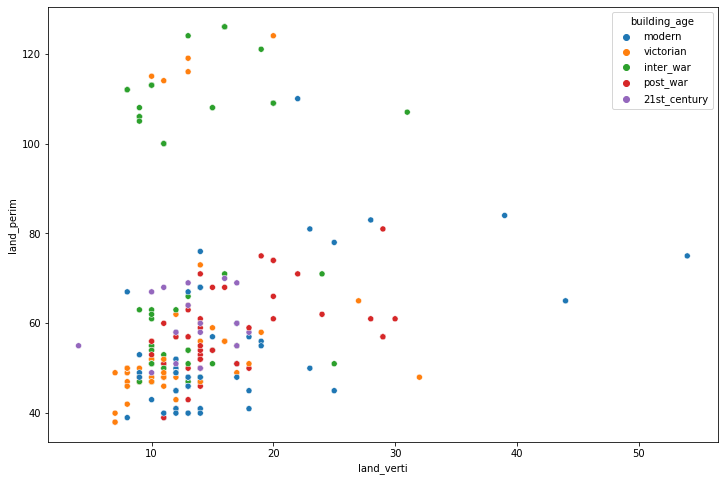

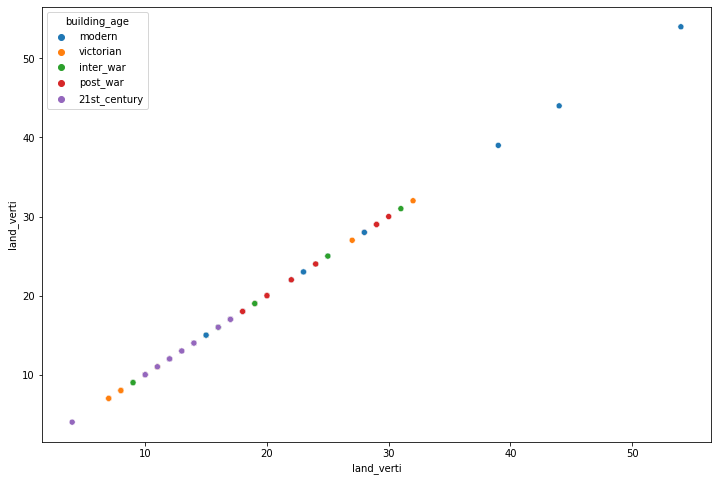

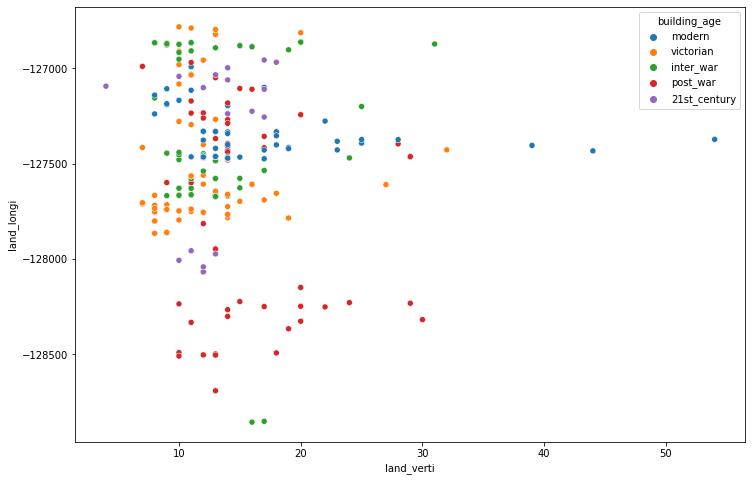

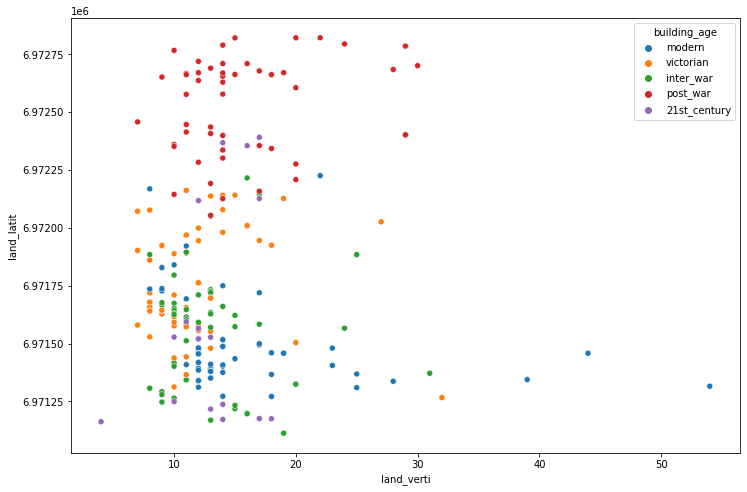

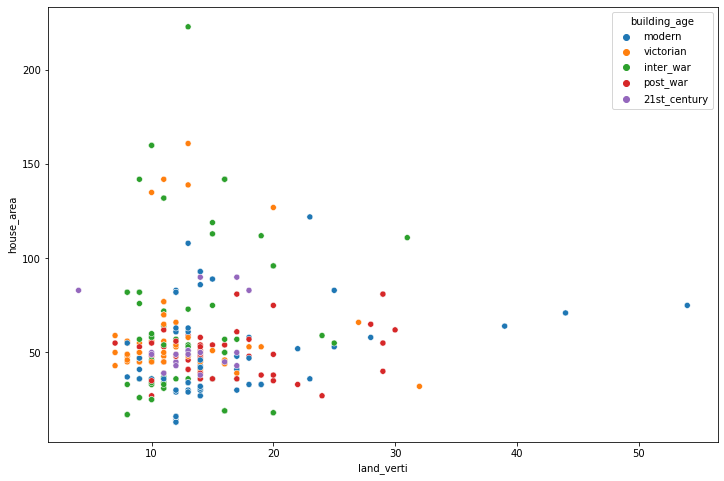

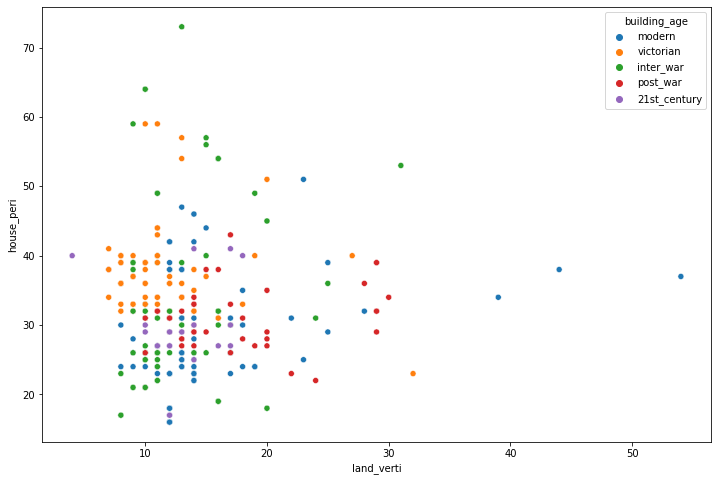

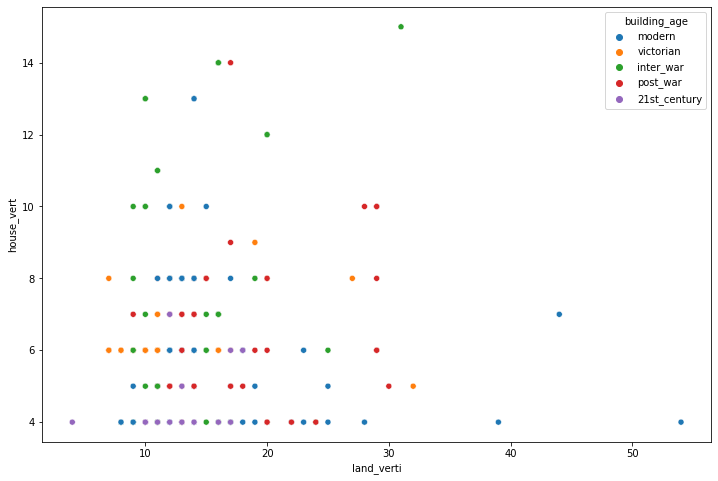

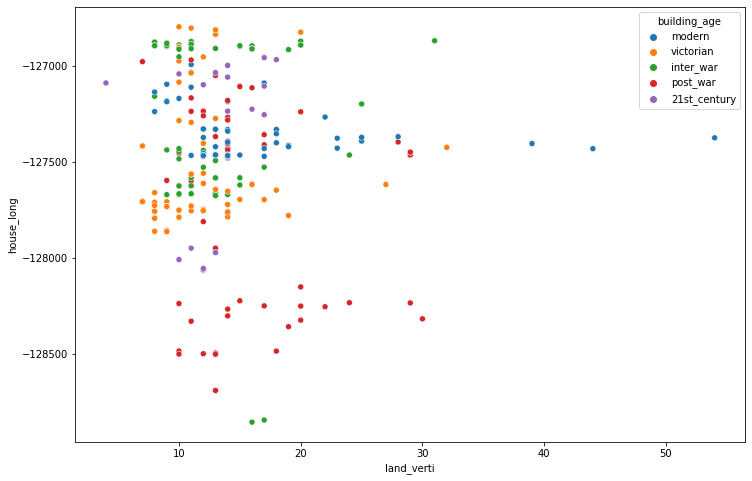

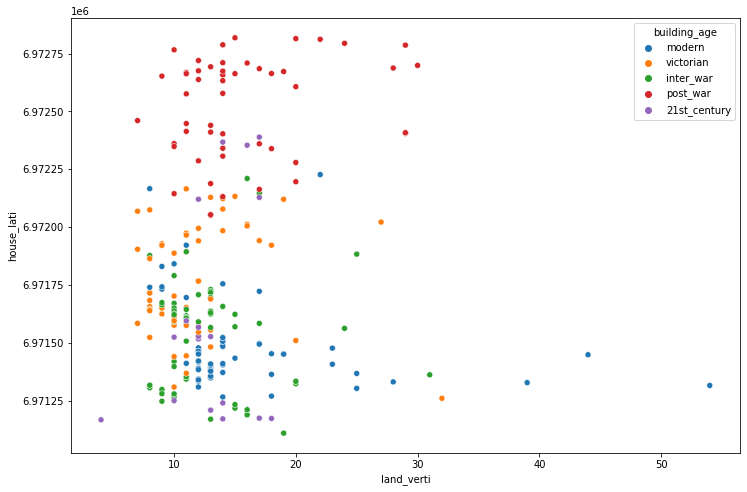

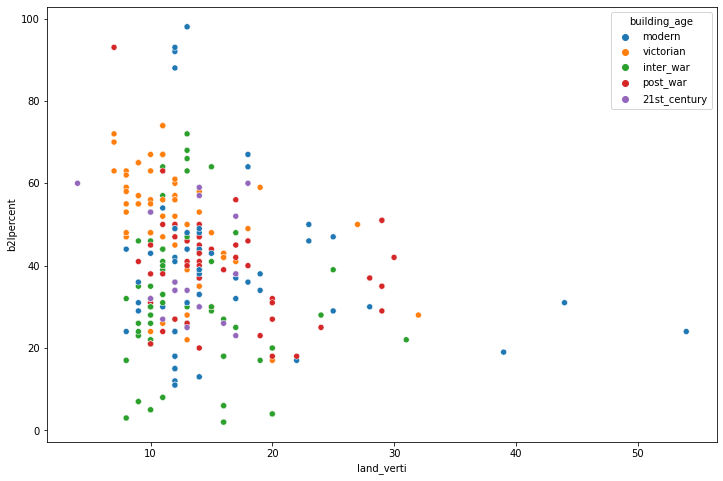

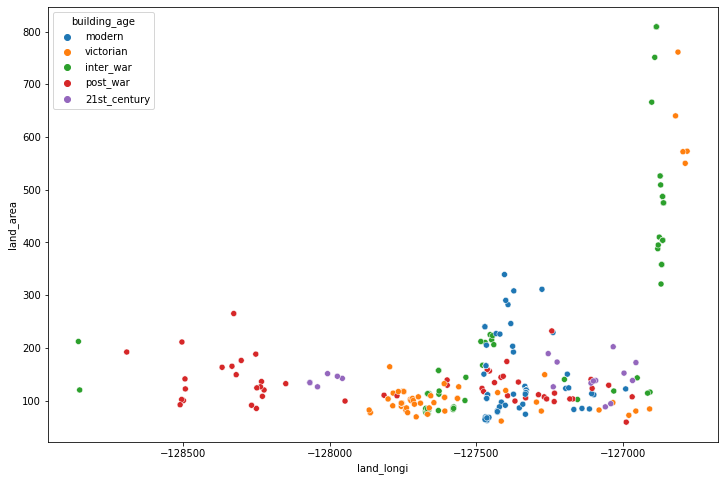

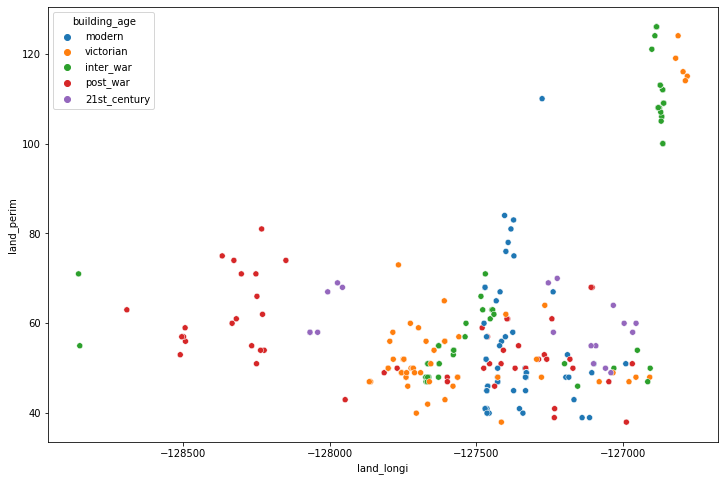

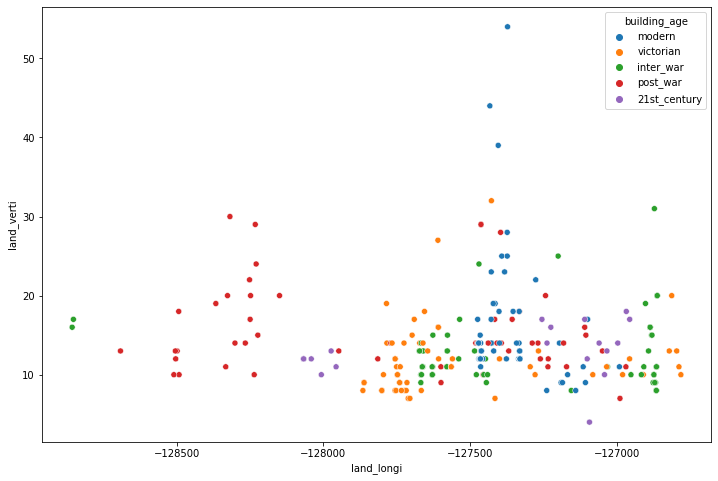

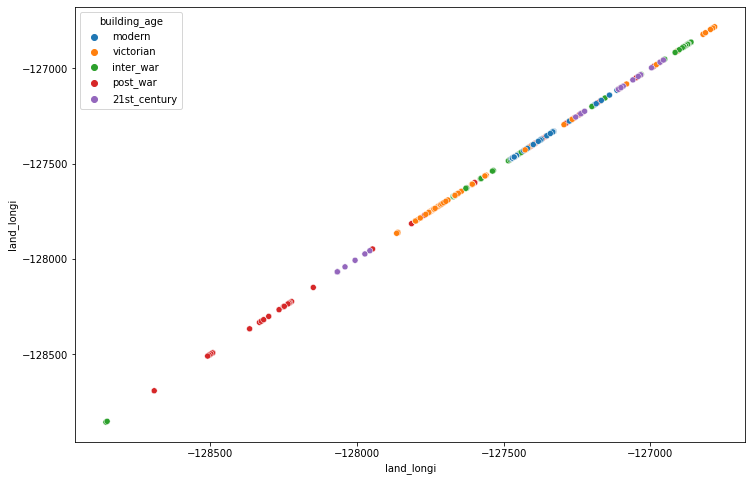

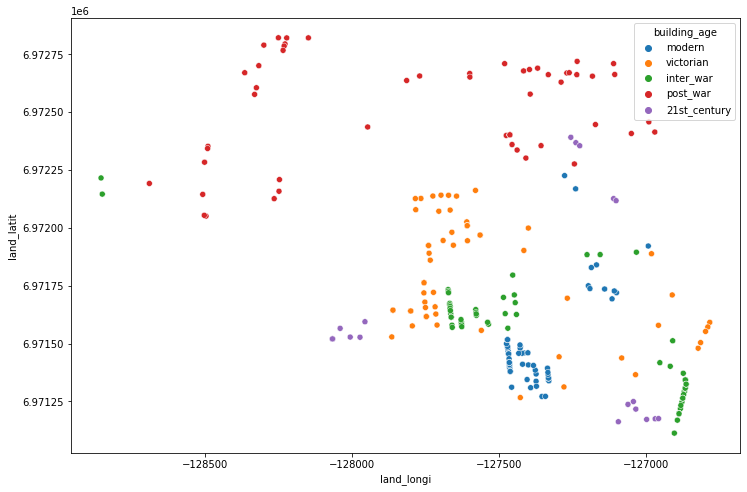

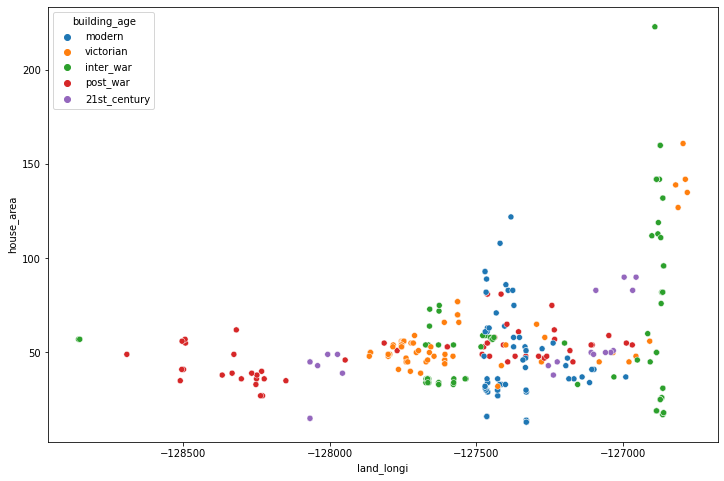

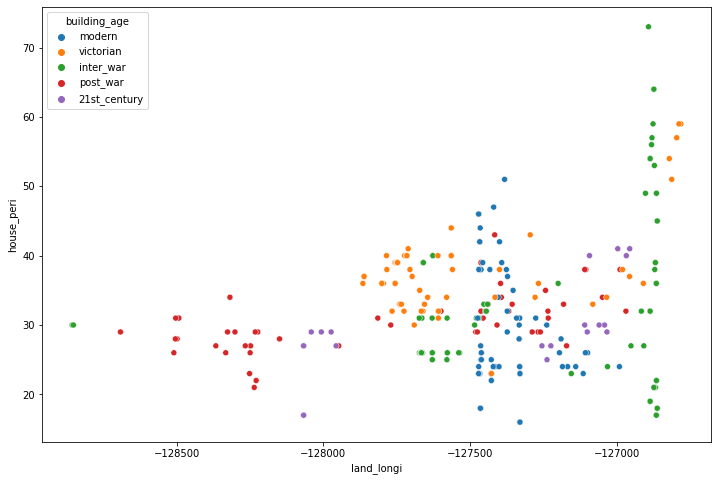

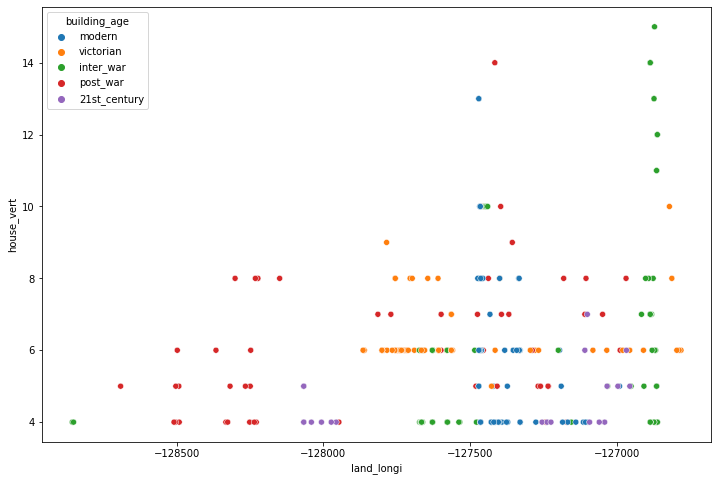

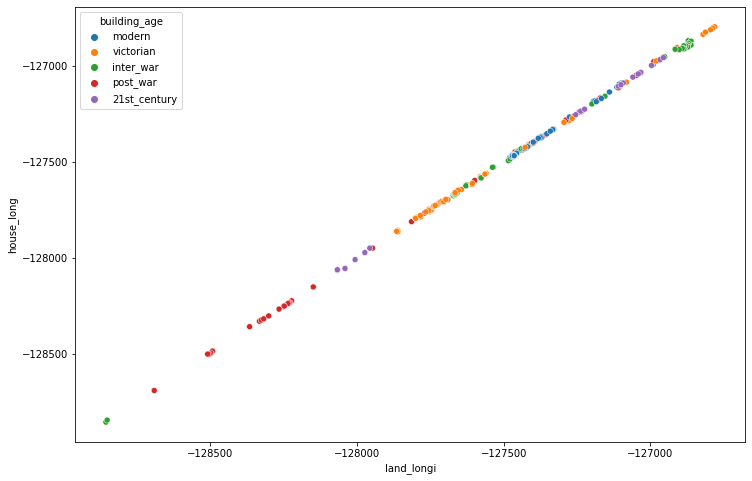

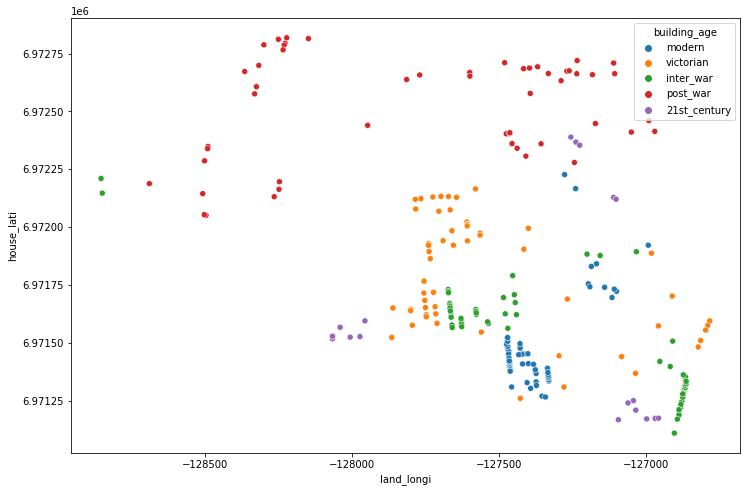

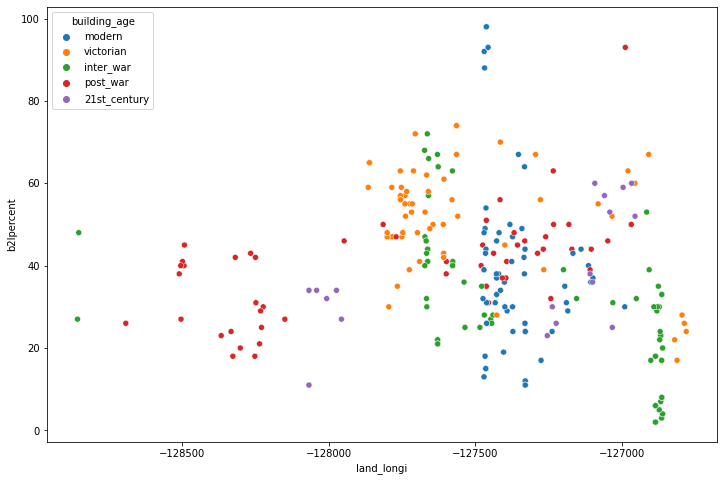

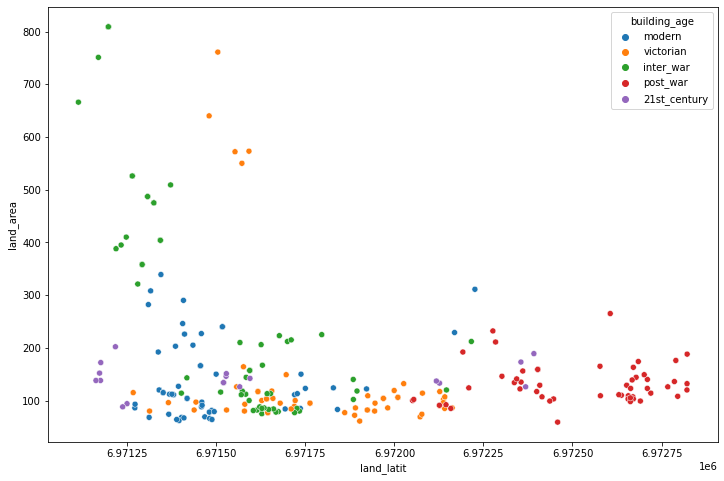

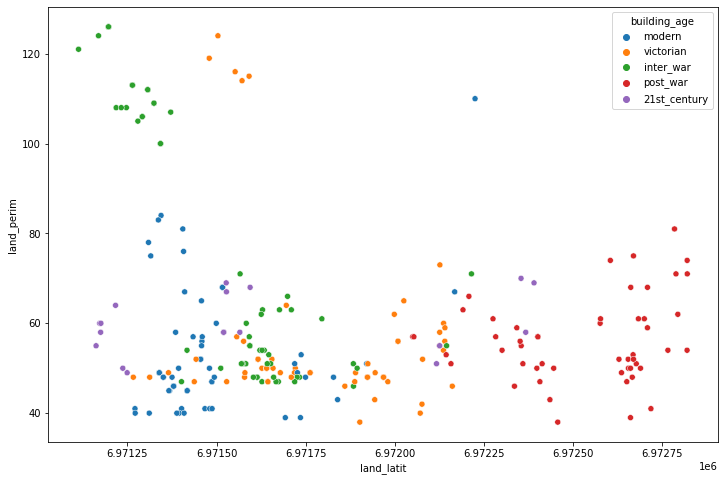

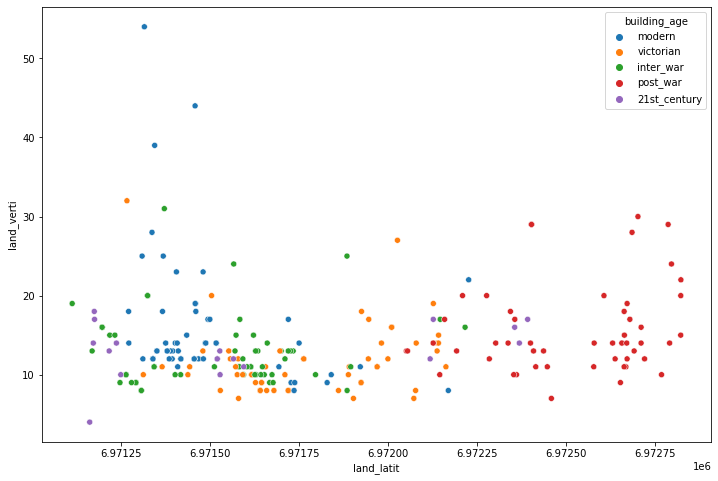

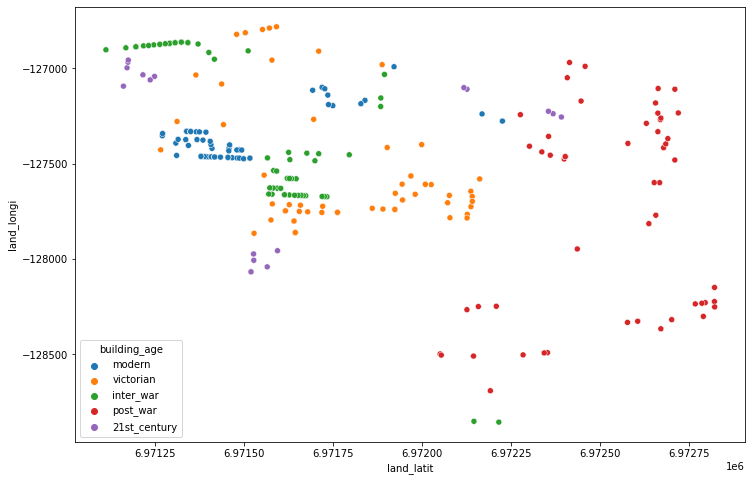

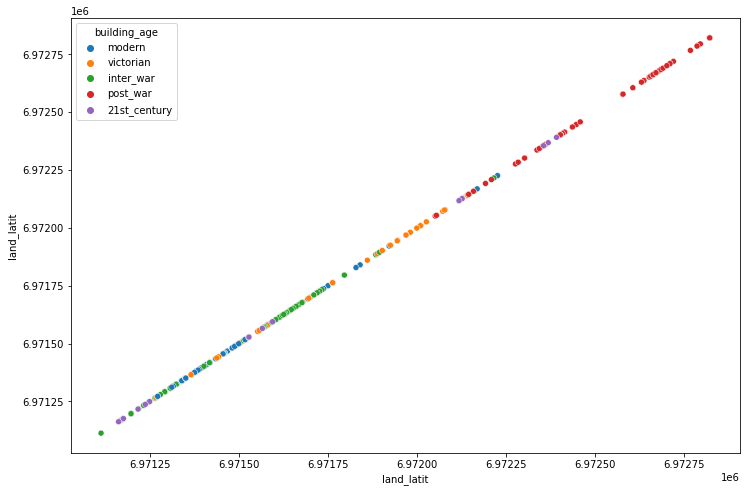

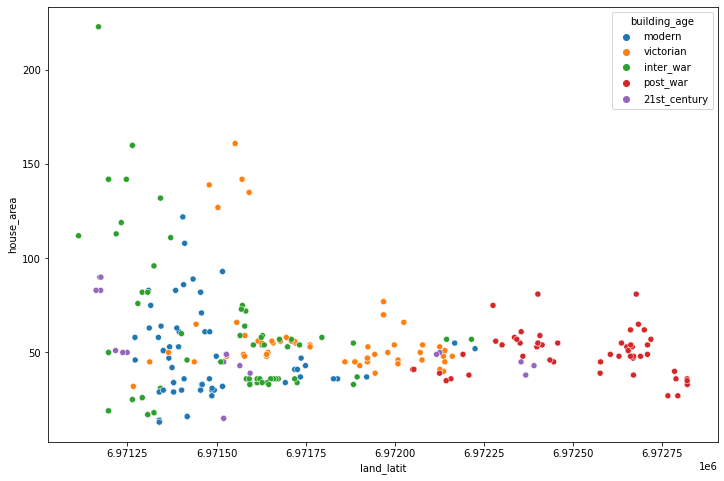

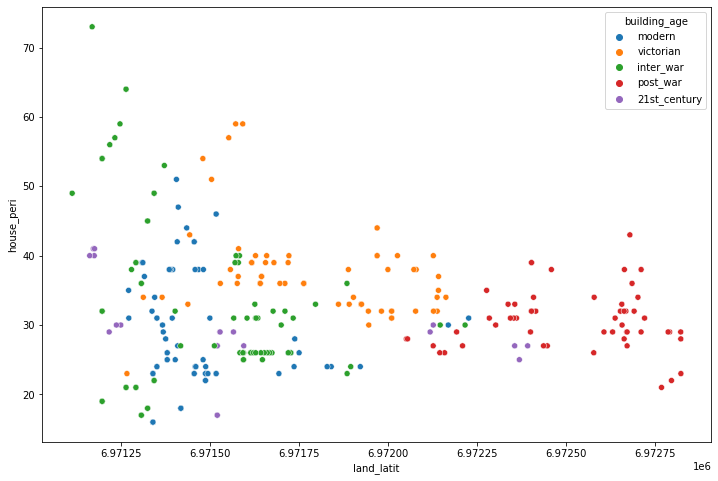

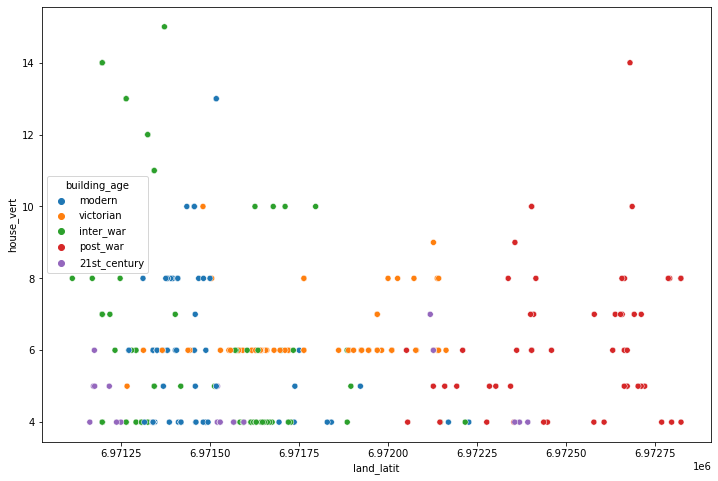

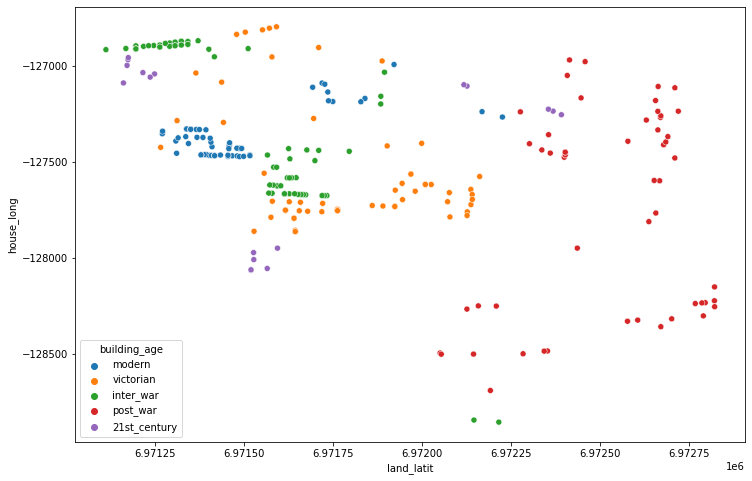

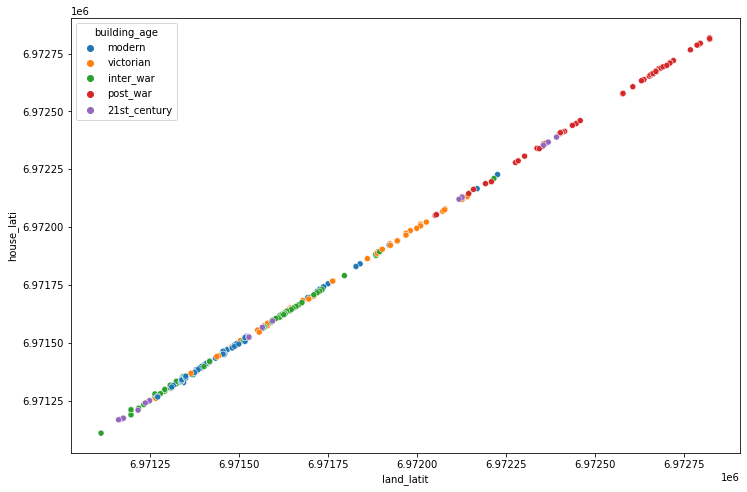

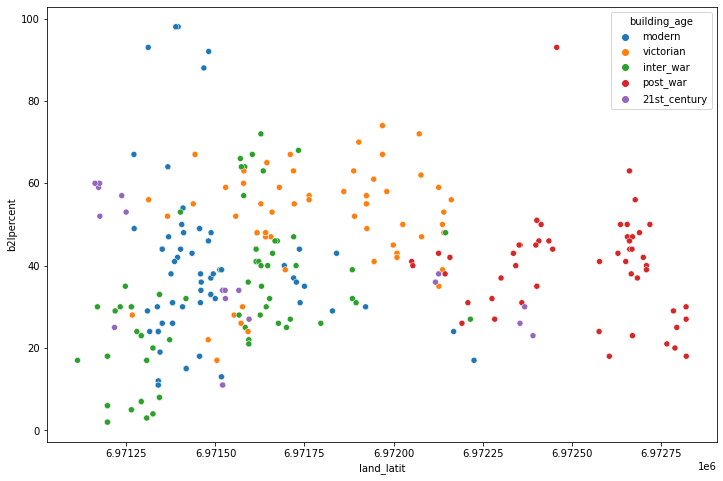

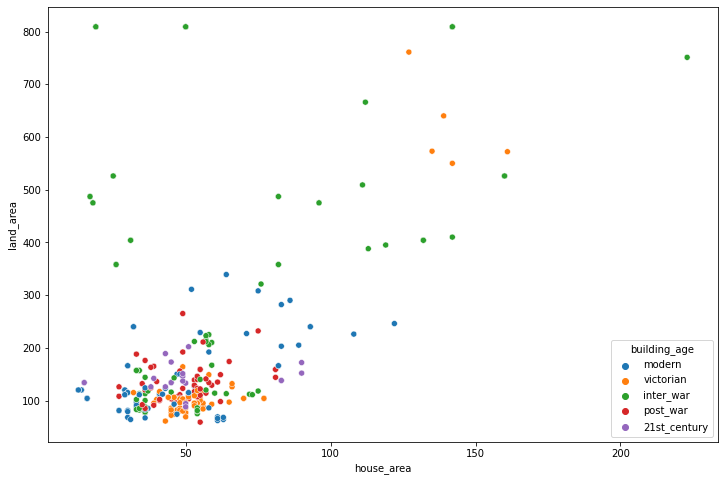

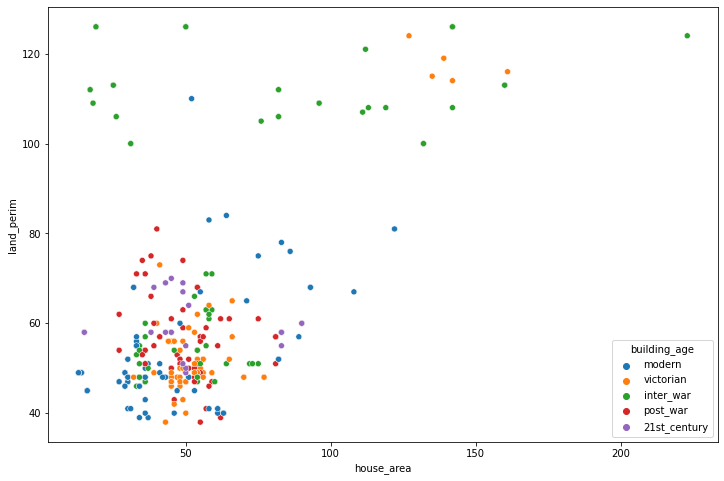

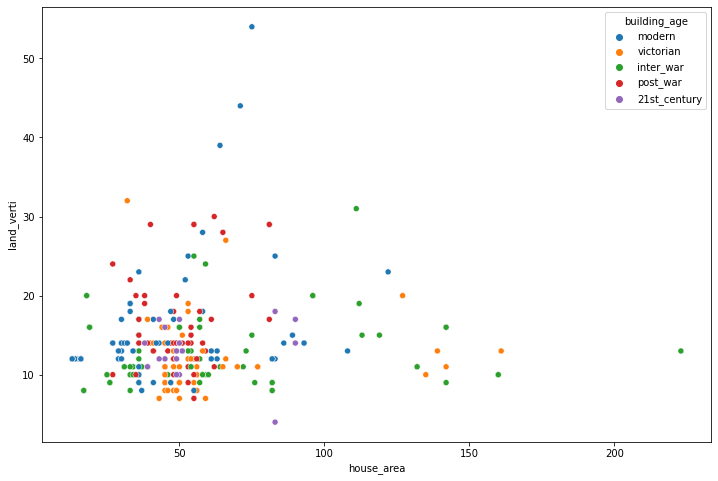

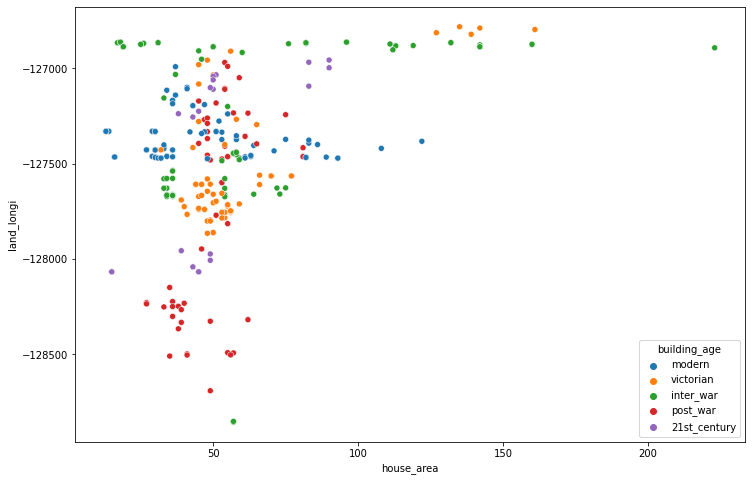

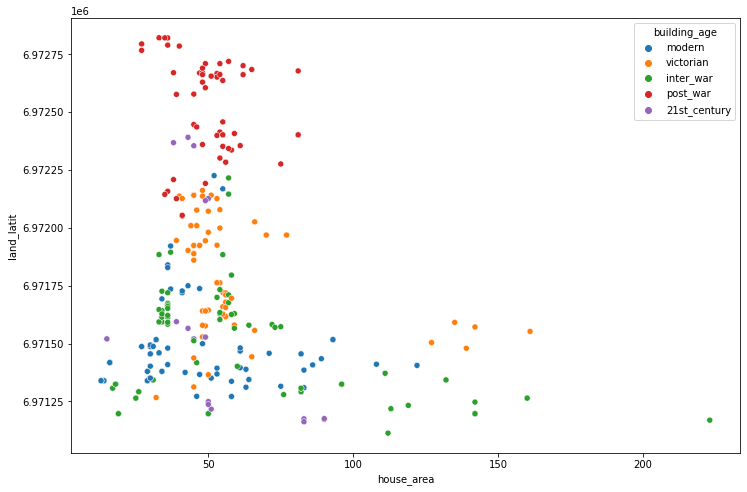

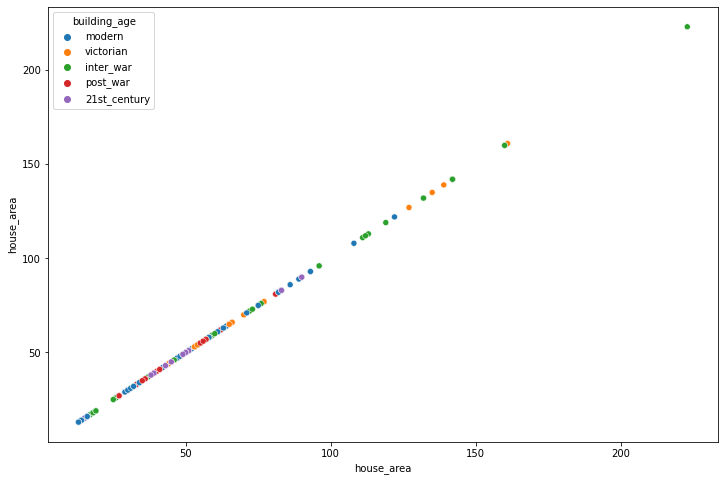

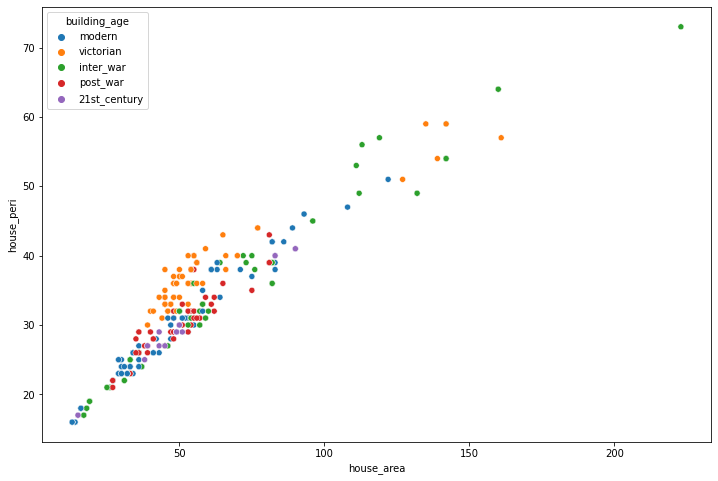

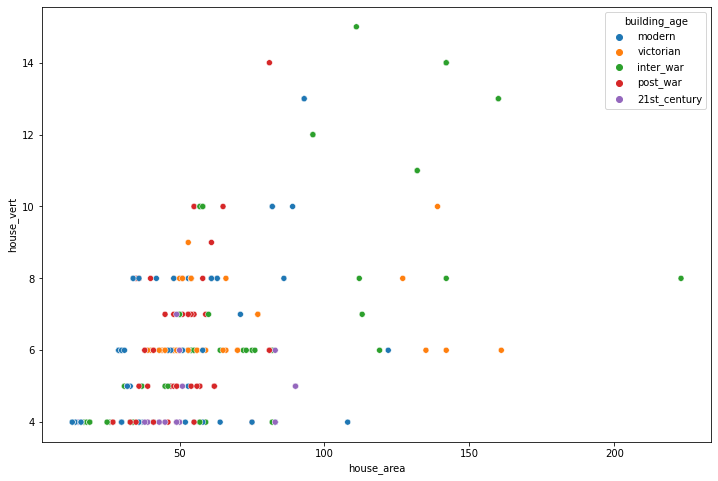

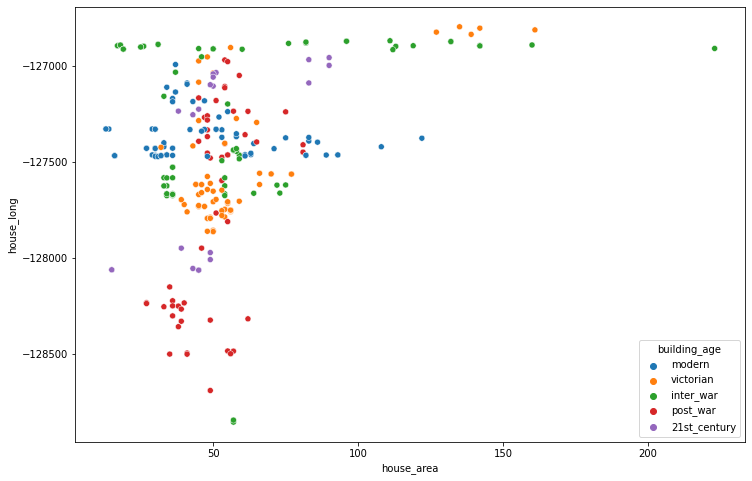

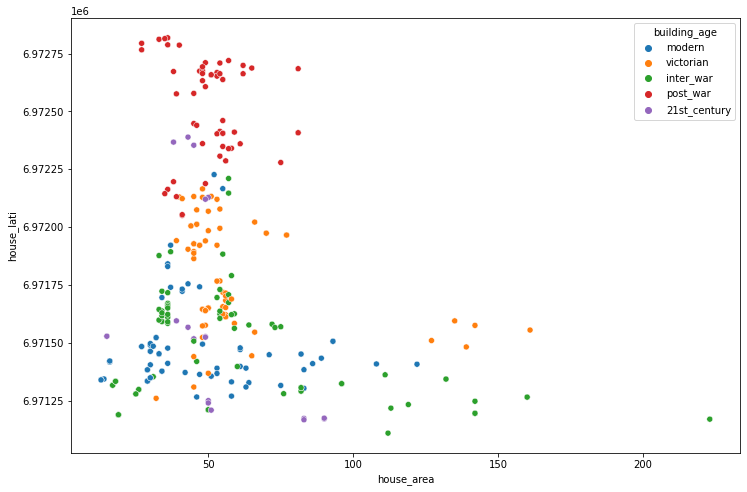

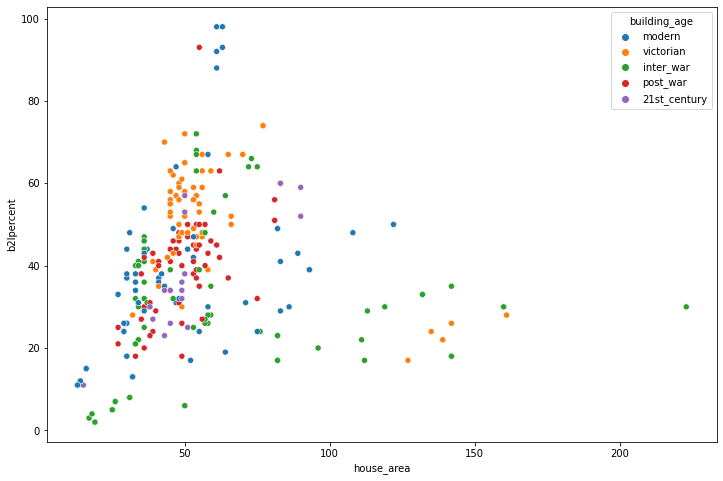

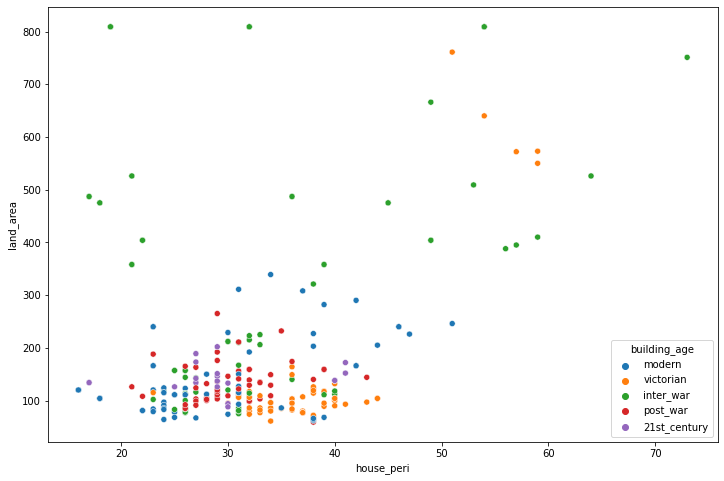

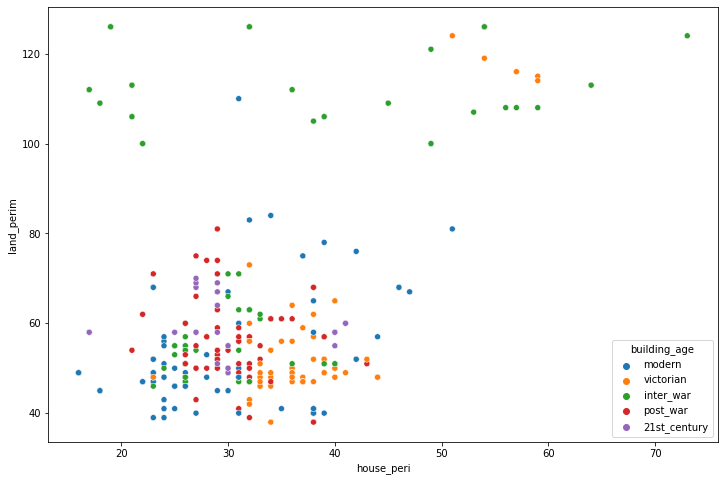

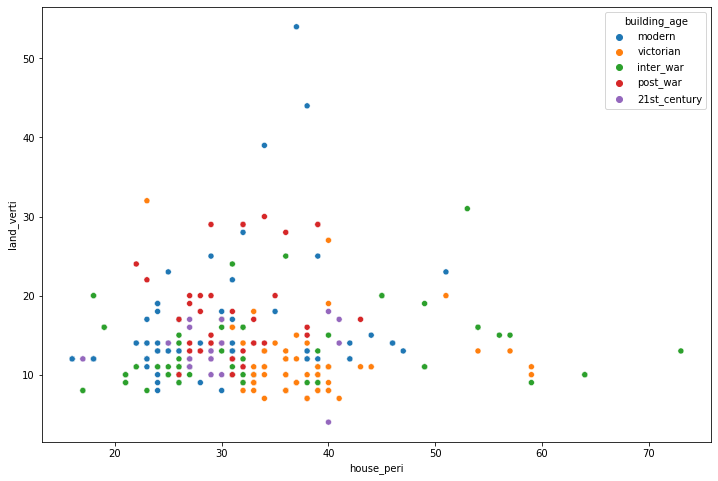

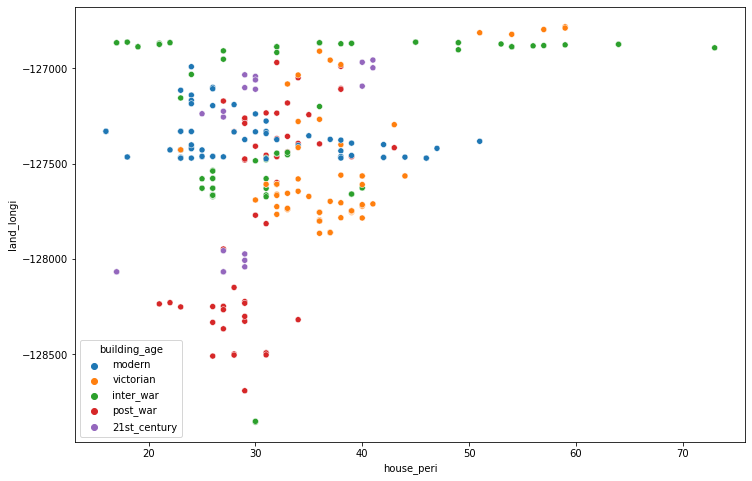

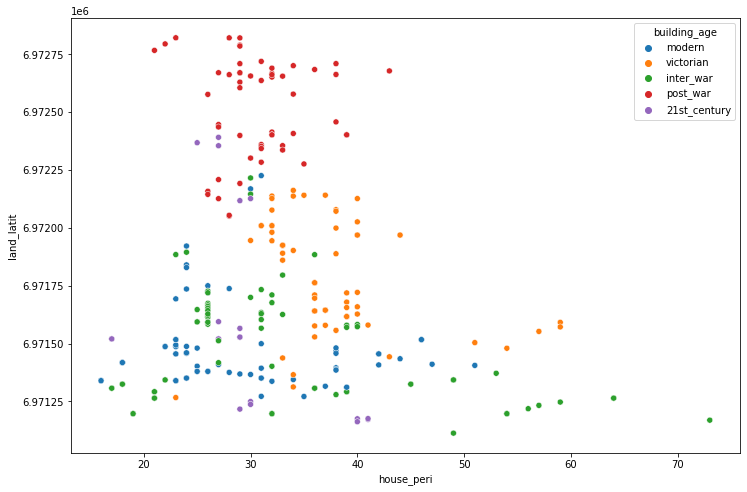

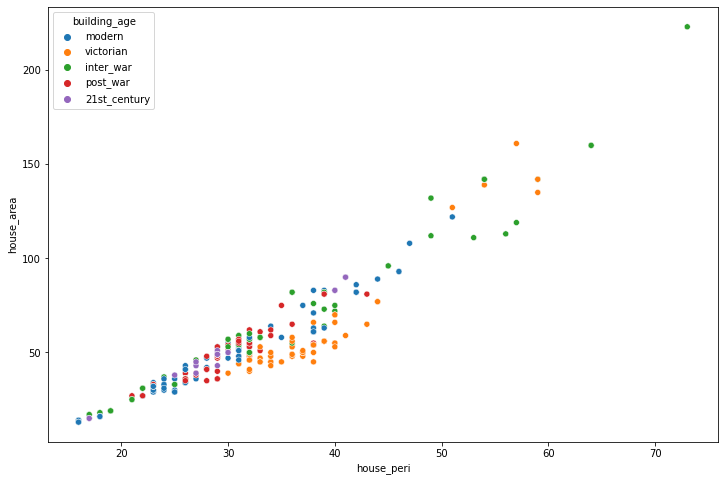

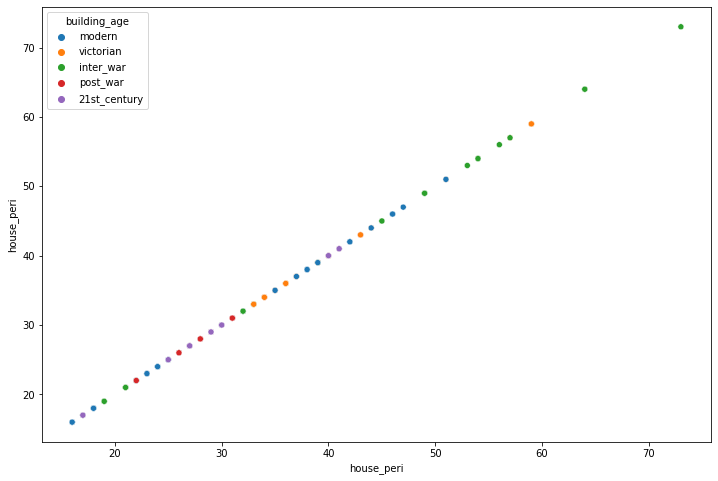

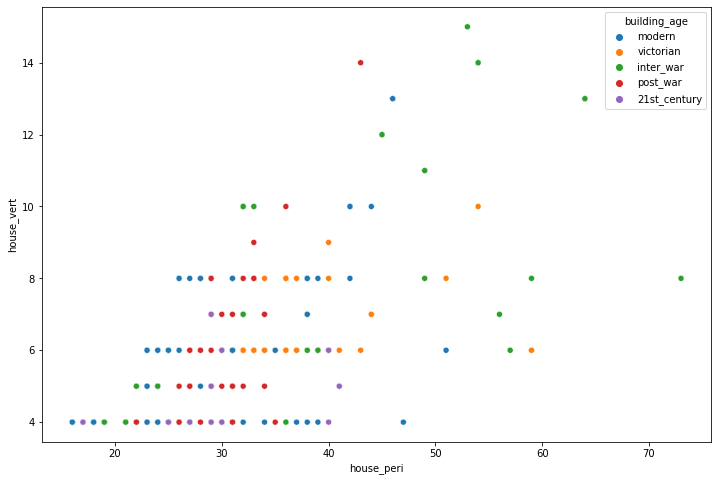

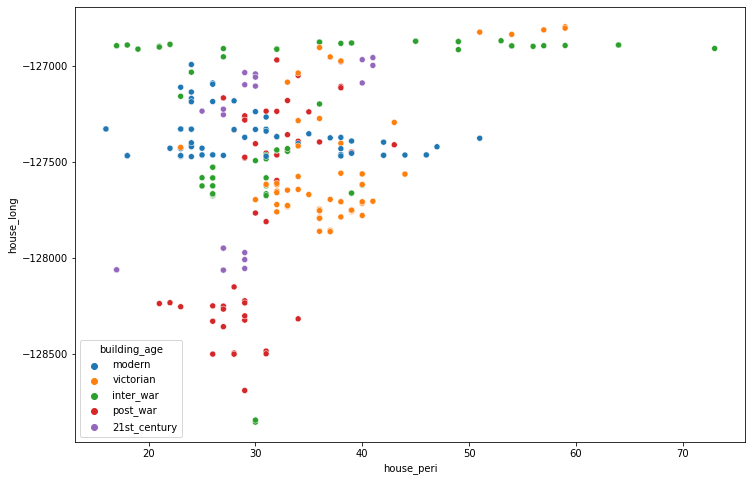

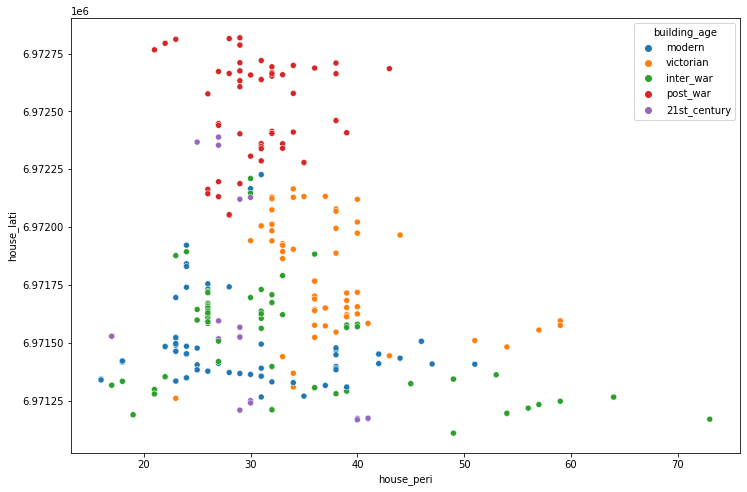

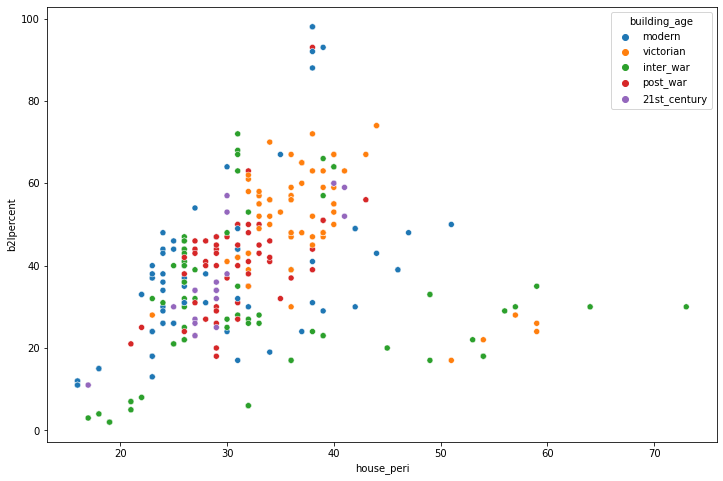

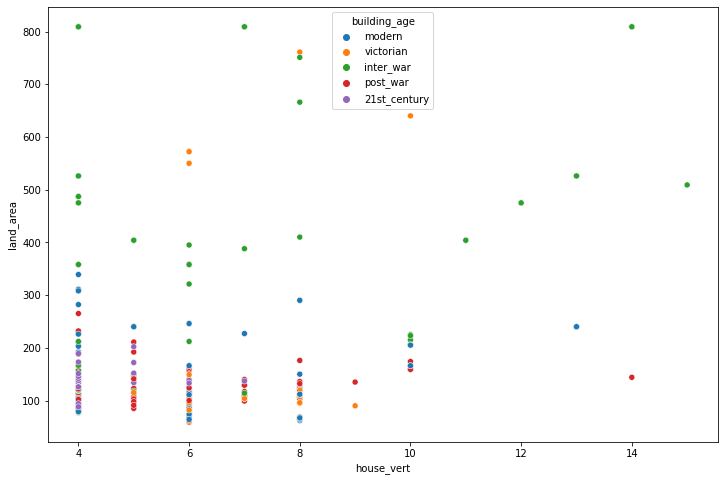

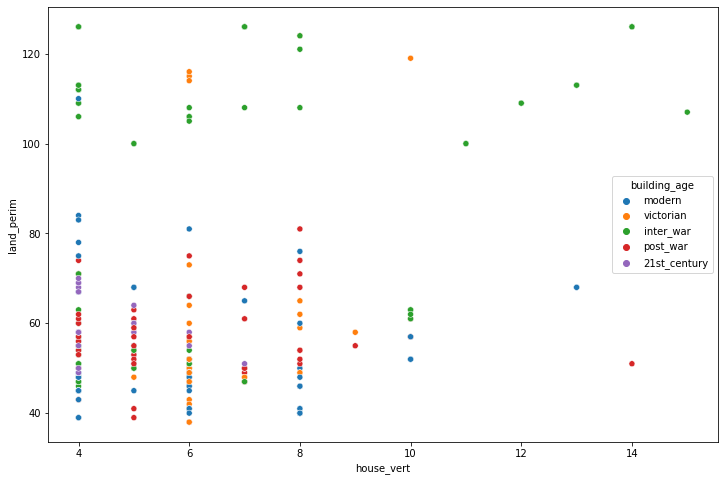

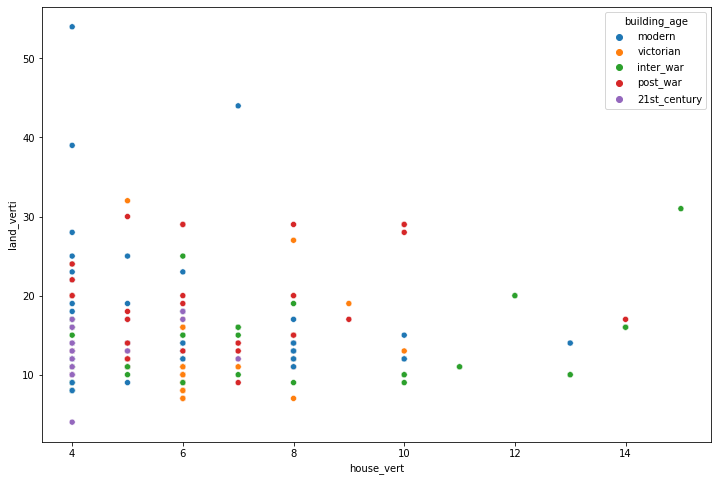

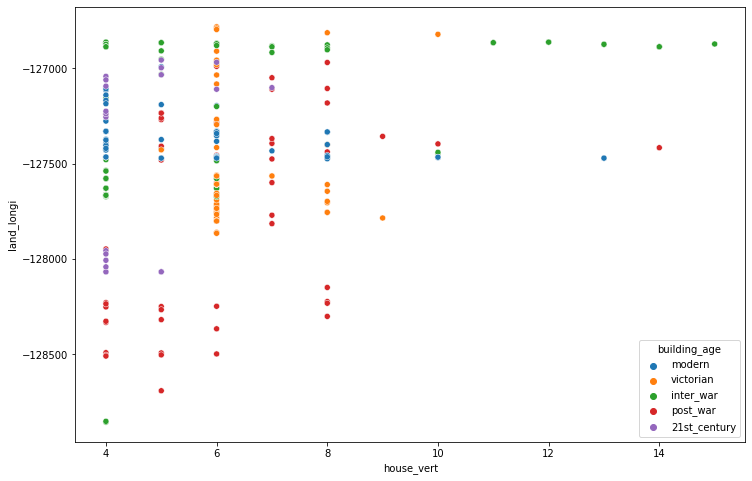

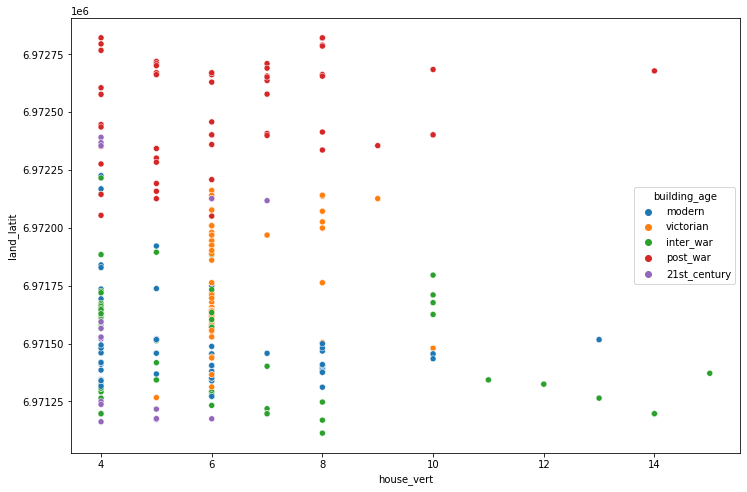

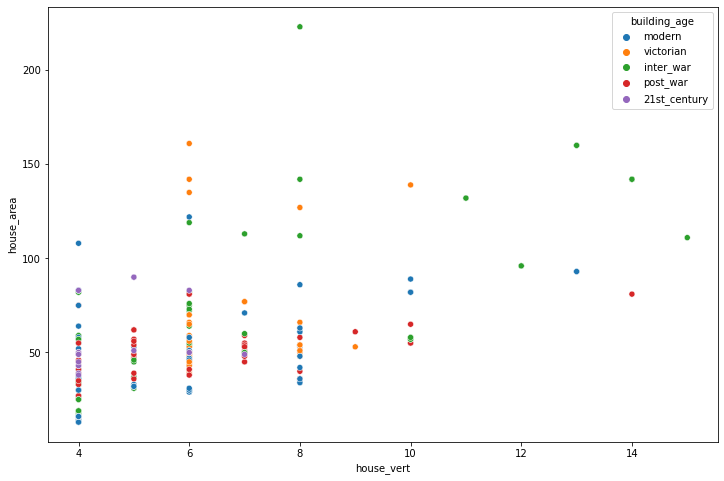

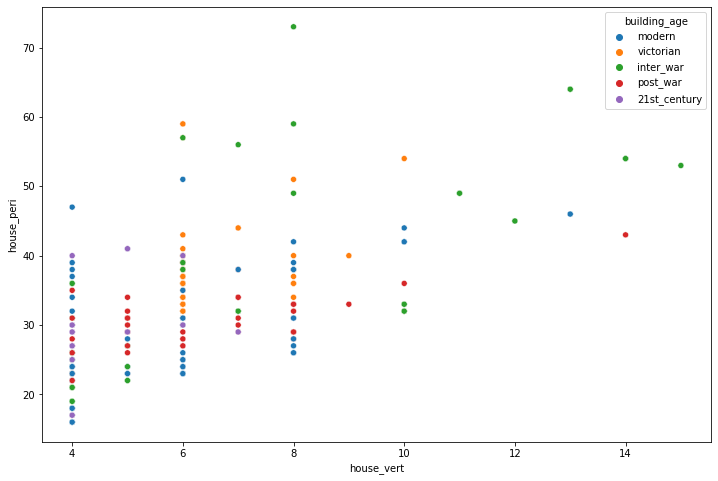

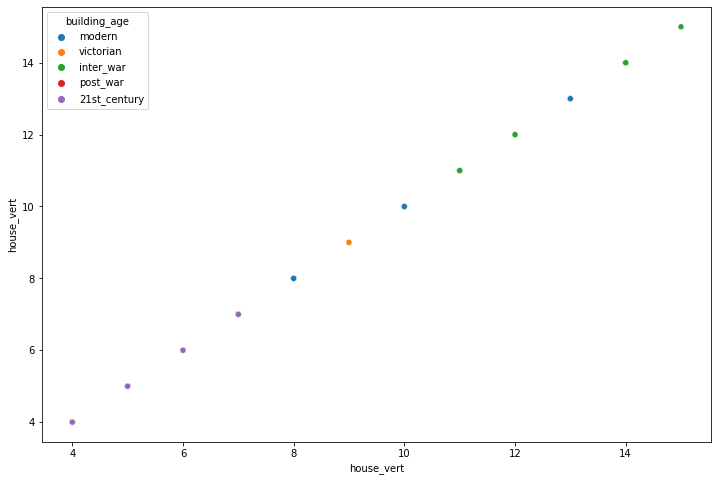

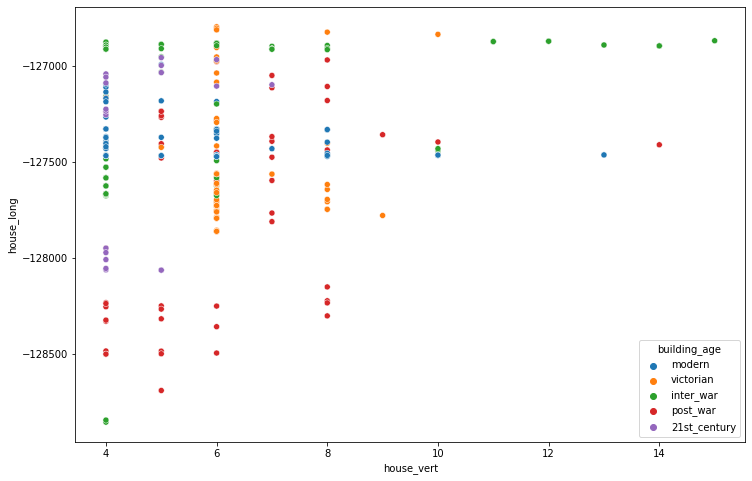

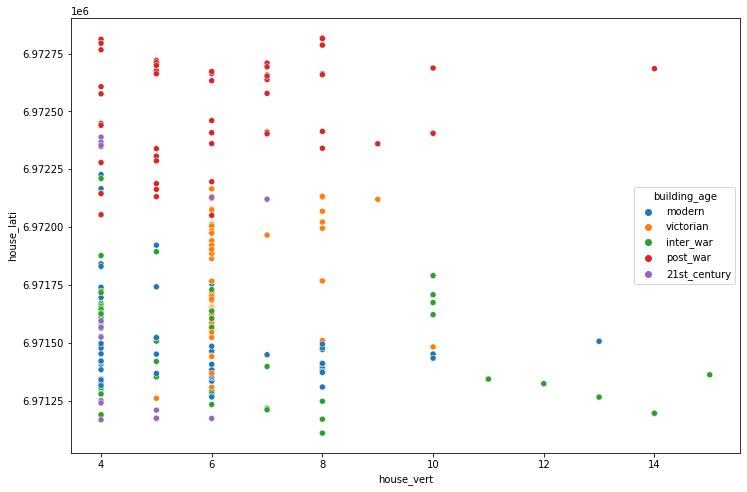

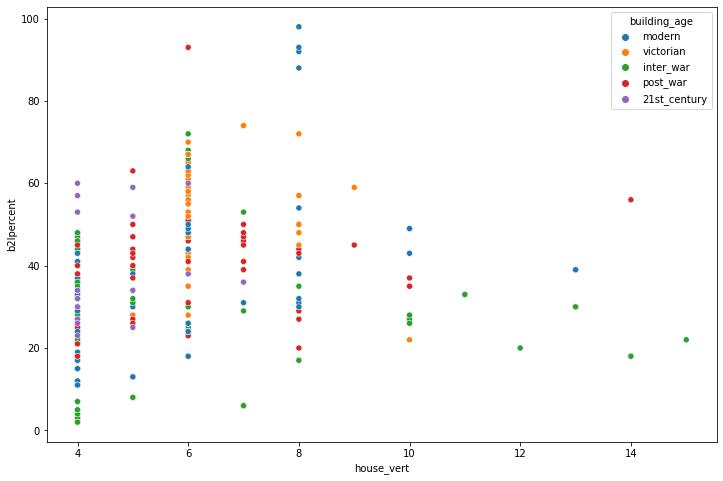

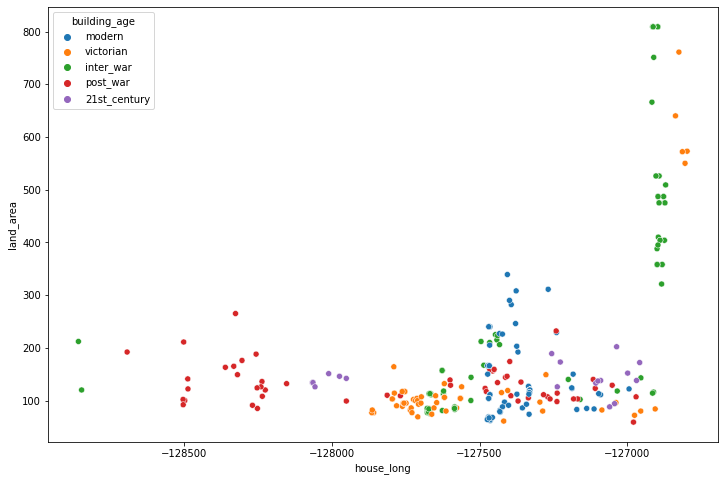

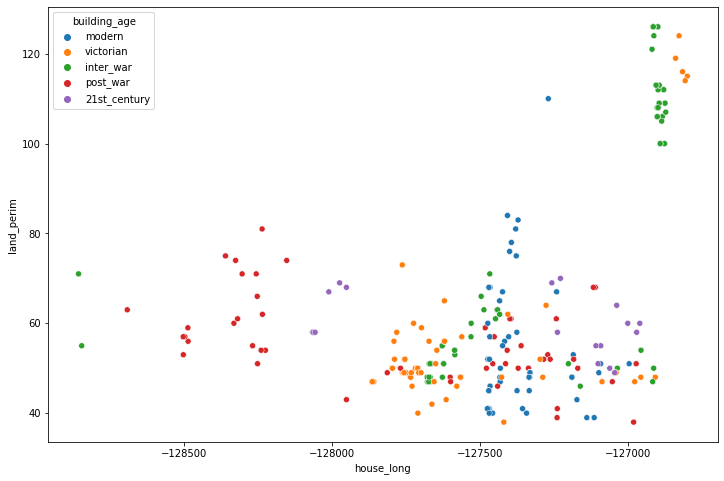

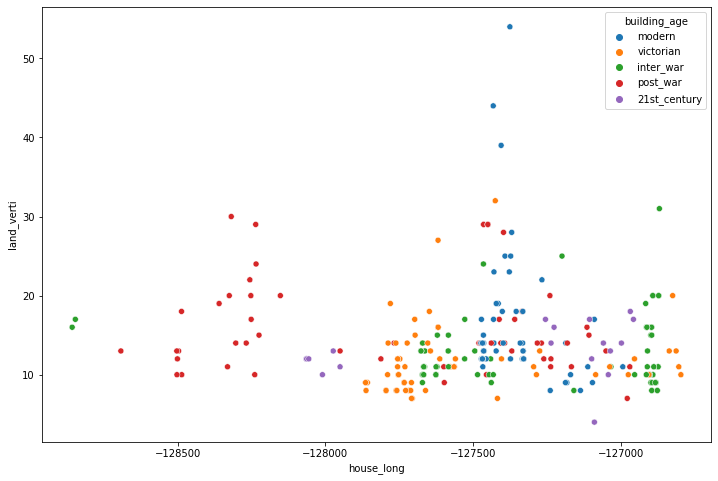

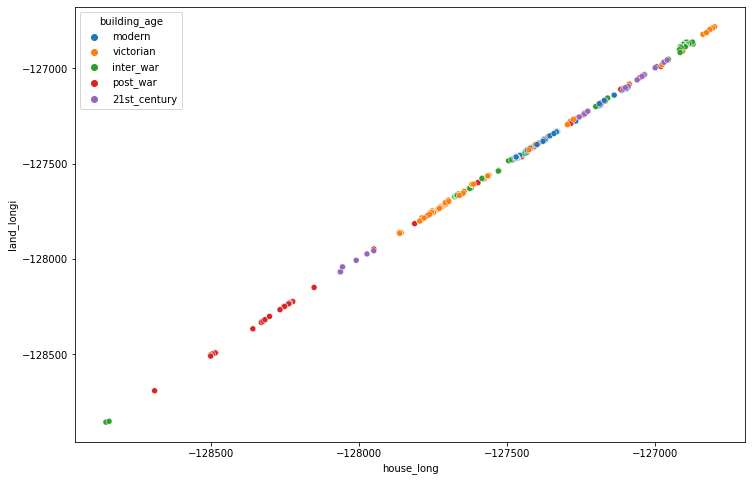

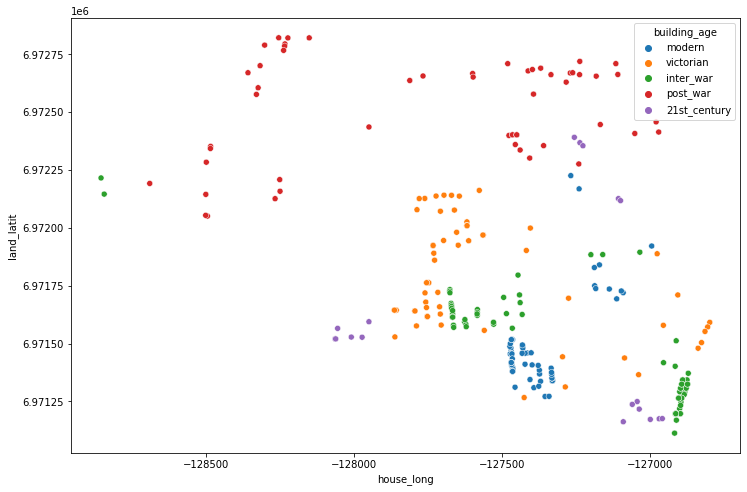

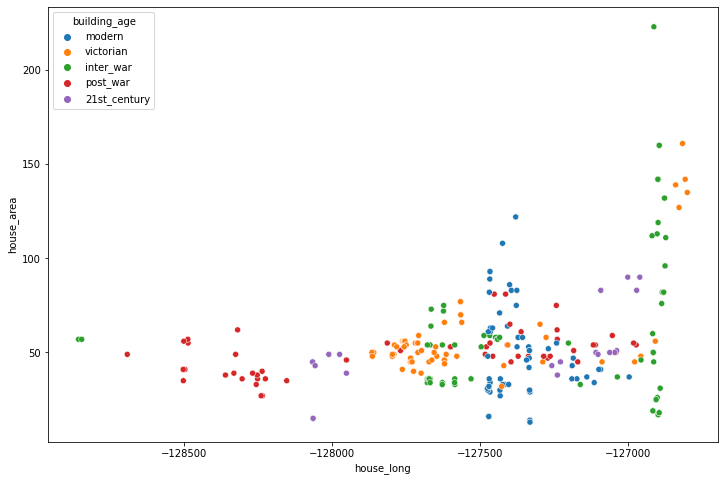

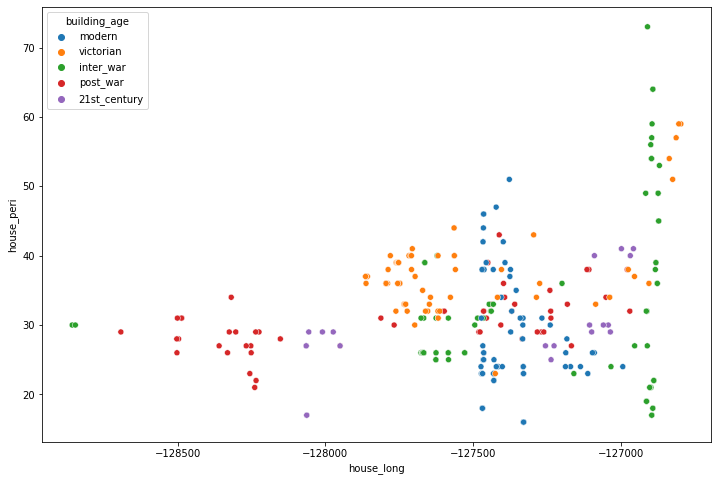

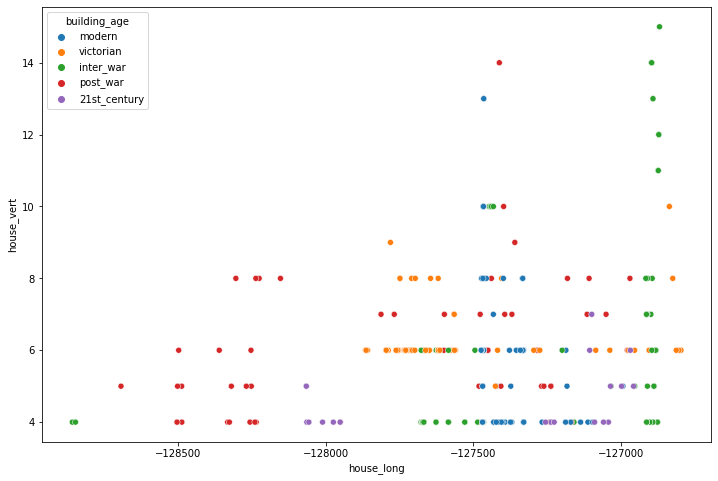

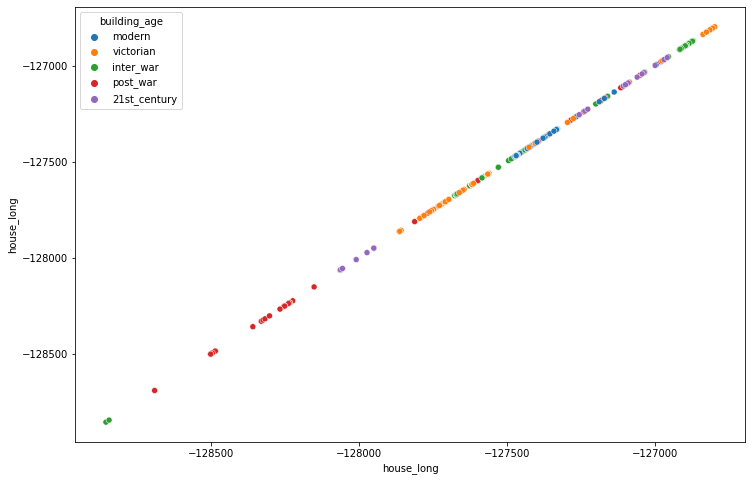

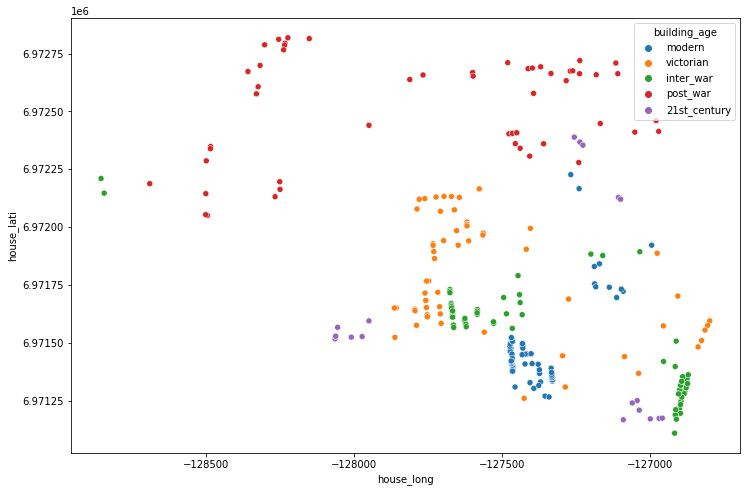

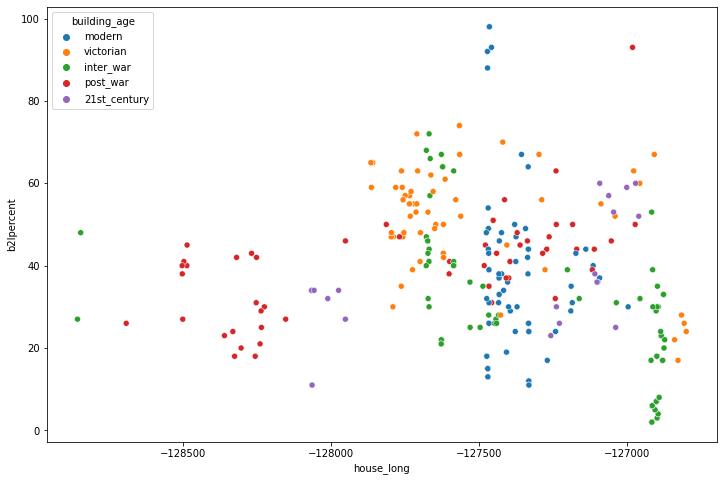

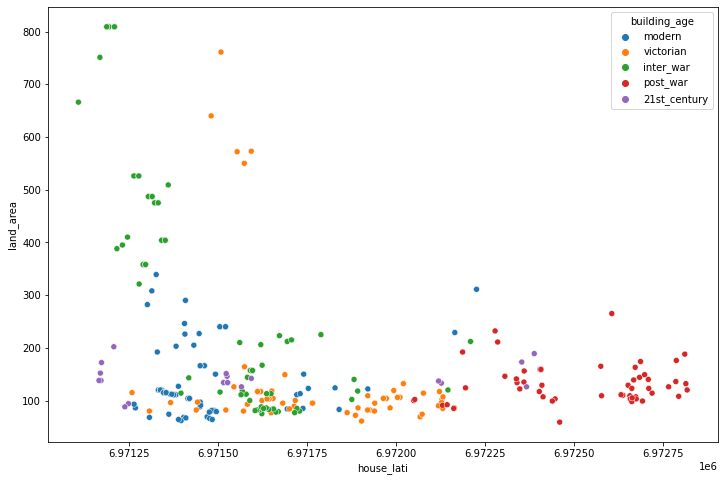

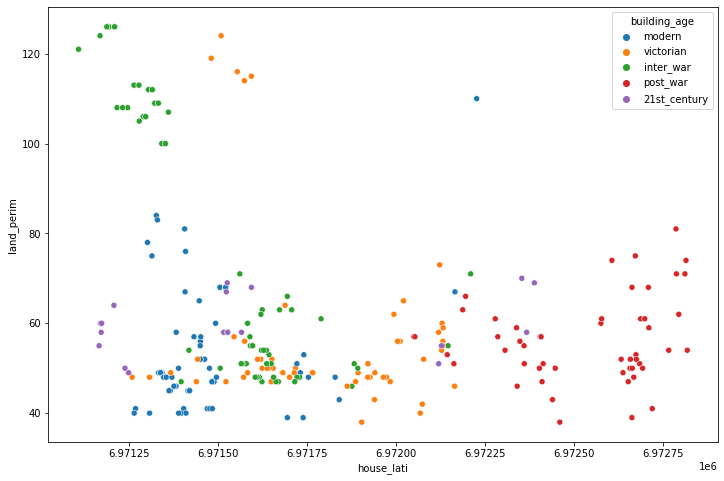

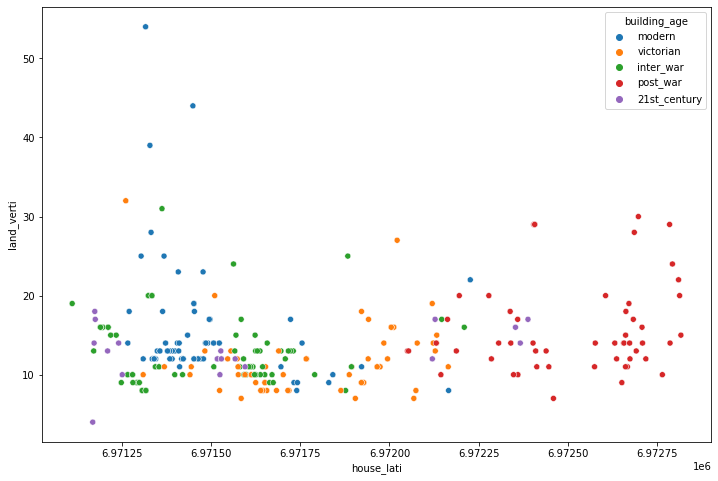

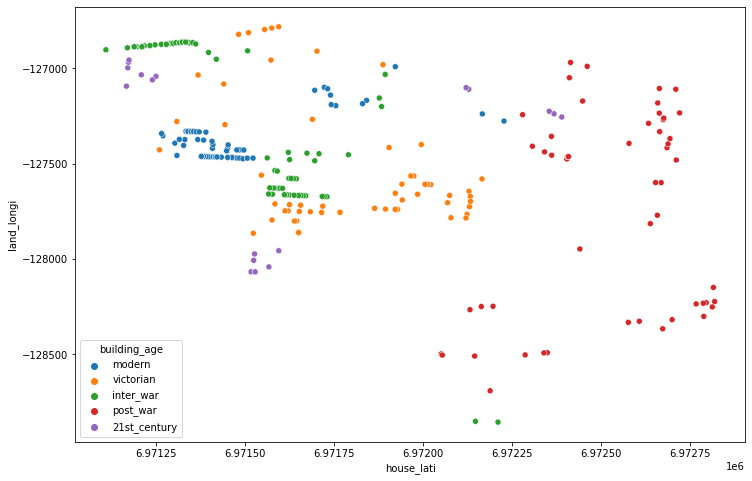

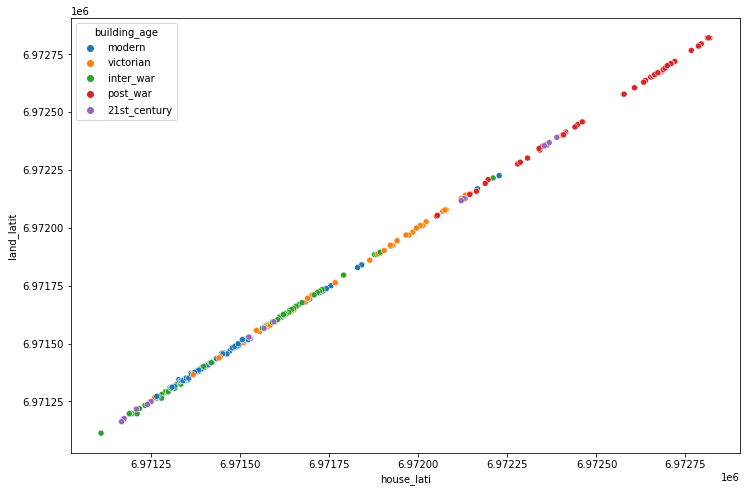

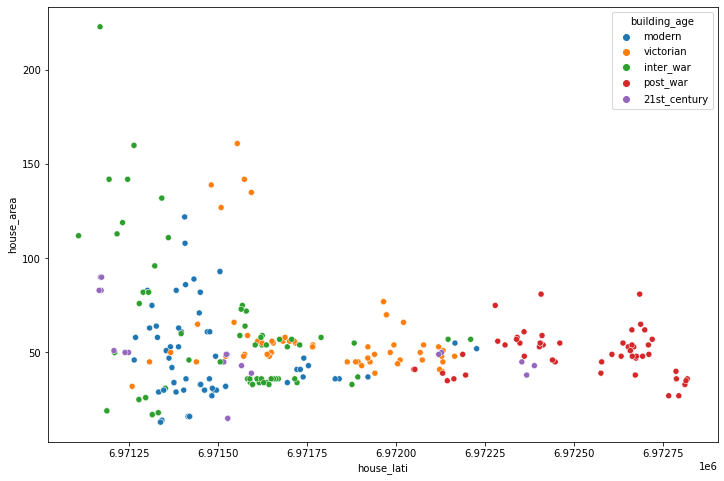

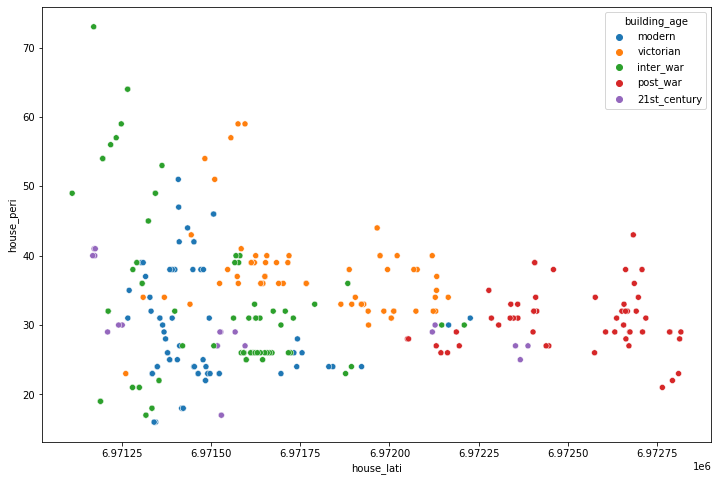

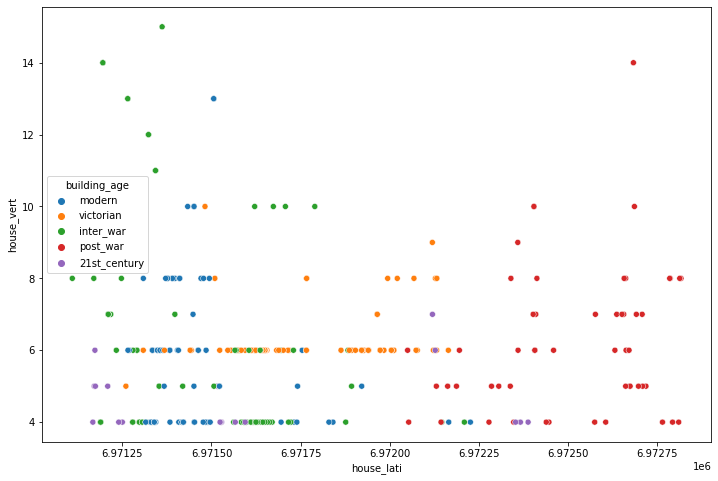

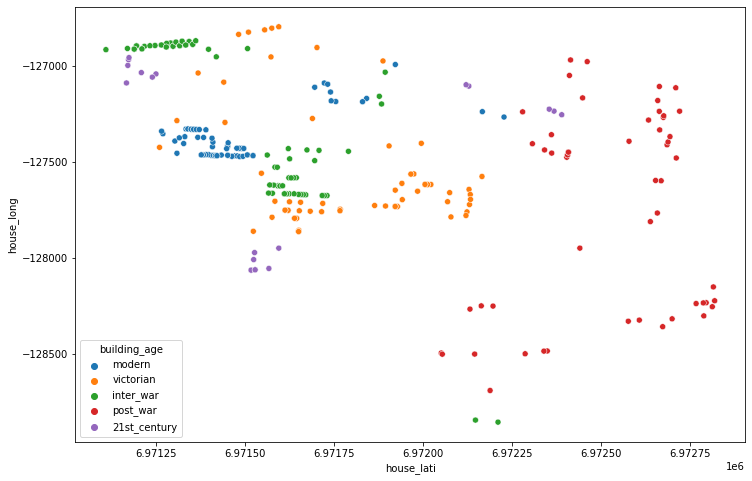

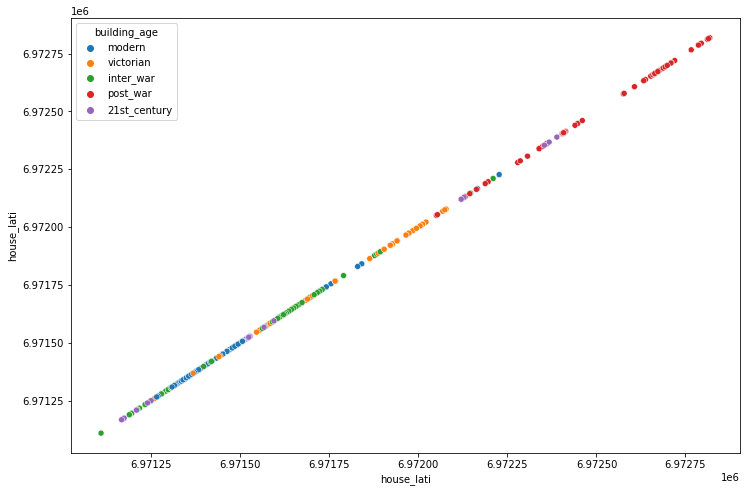

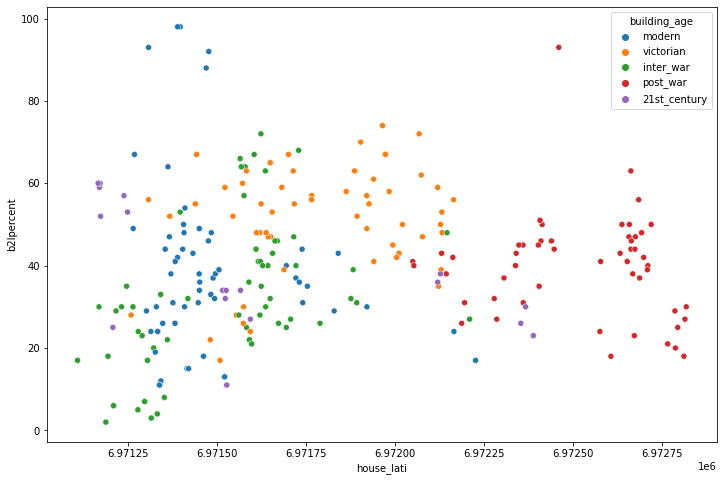

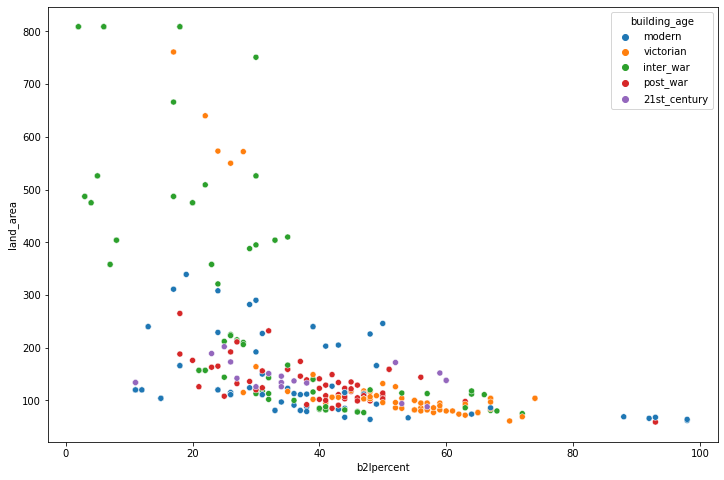

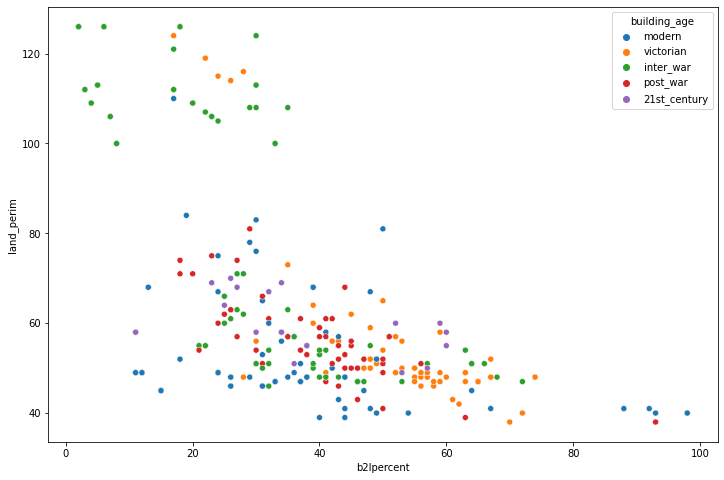

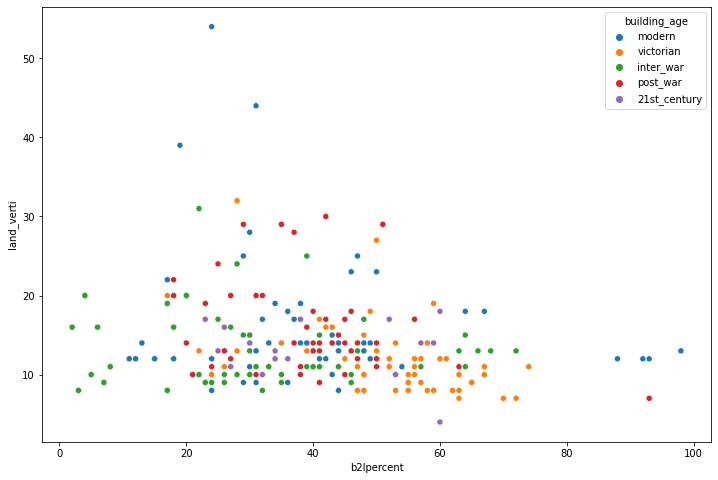

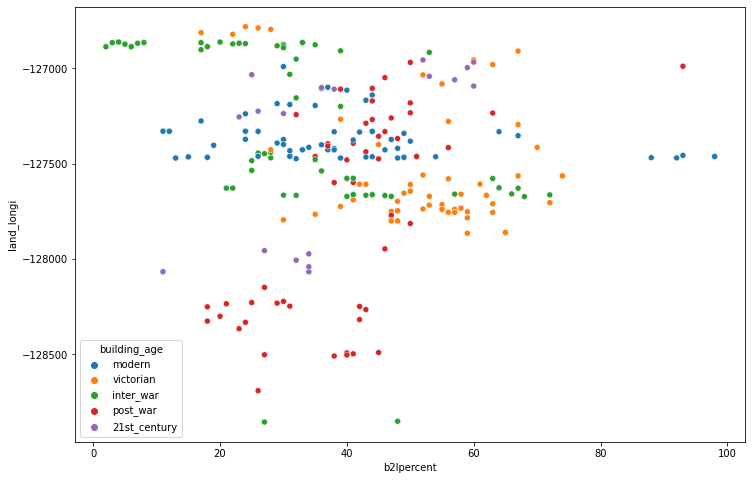

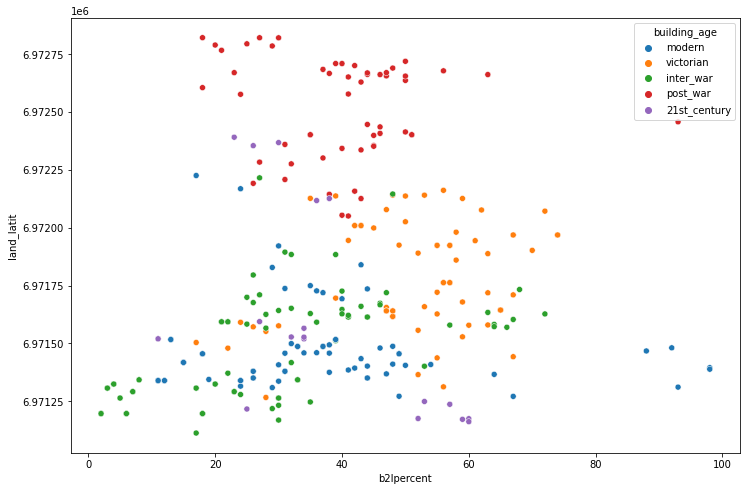

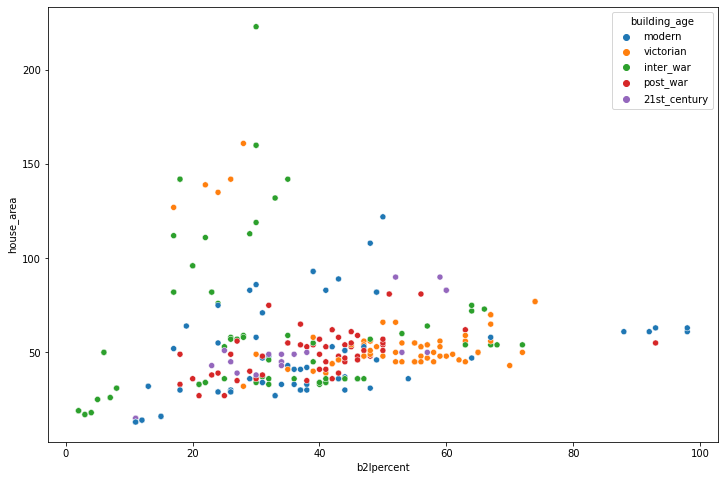

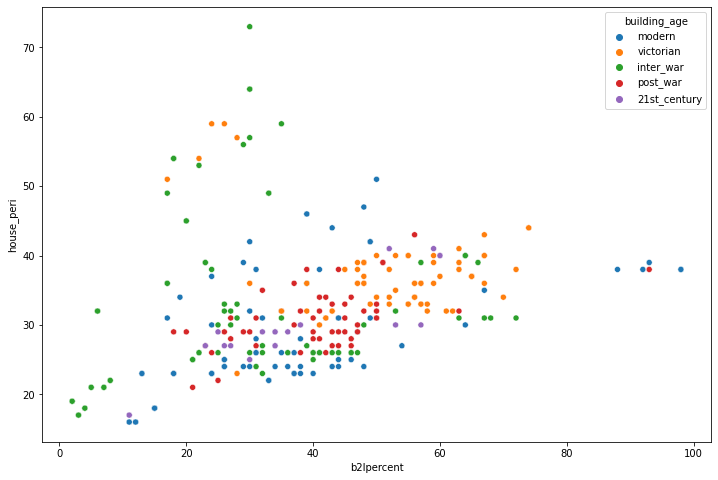

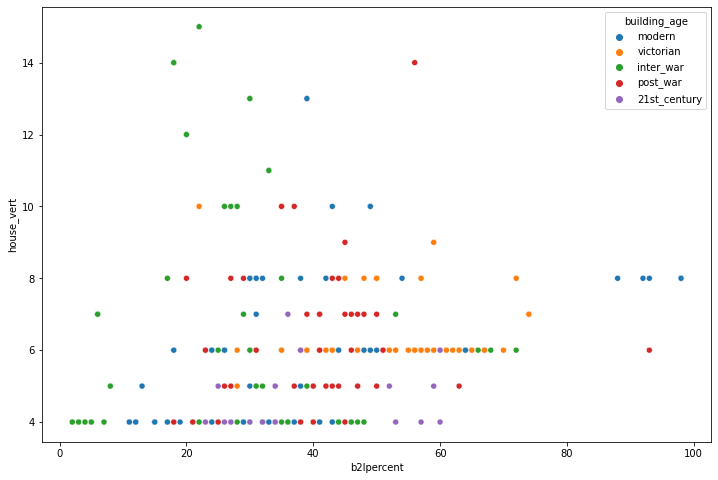

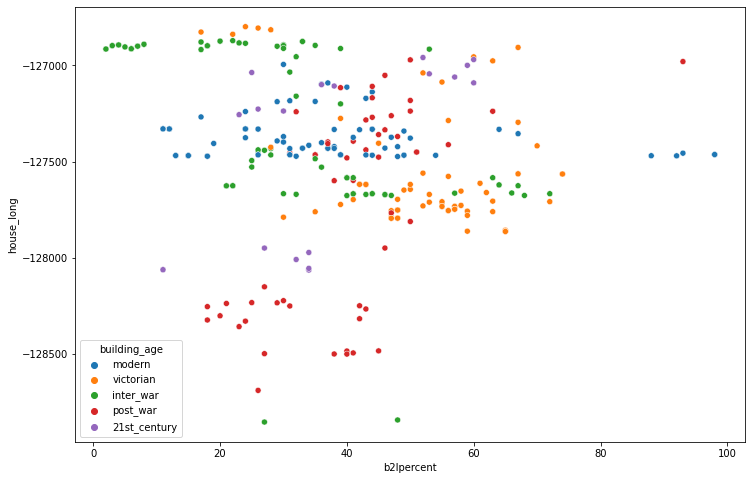

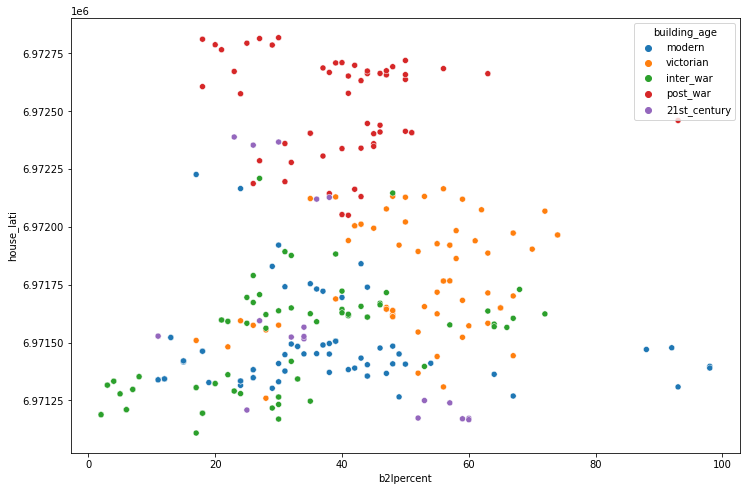

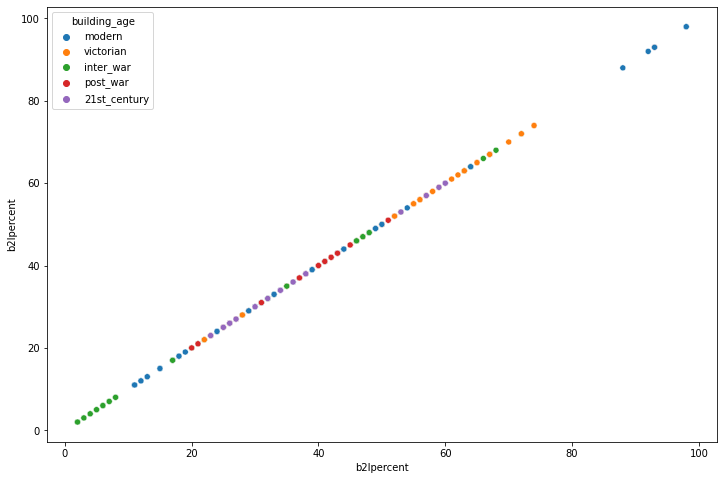

In [9]:
# To see a comparison of all features (use this commented out code)

#features = ['land_area', 'land_perim', 'land_verti', 'land_longi', 'land_latit',
#            'osm_way_id', 'house_area', 'house_peri',
#            'house_vert', 'house_long', 'house_lati', 'b2lpercent']
features = ['land_area', 'land_perim', 'land_verti', 'land_longi', 'land_latit', 'house_area', 'house_peri',
            'house_vert', 'house_long', 'house_lati', 'b2lpercent']

# Correlation for features
for feature in features:
    for feature2 in features:
        if feature2 != features:
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=feature, y=feature2, hue='building_age', data=labelled_data)
            plt.savefig('../3_plots/c_correlation/pairs/'+feature+'_'+feature2+'.png')
            #plt.show()
            
            
    

# Preparing features for training model

In [10]:
!pip install scikit-learn xgboost

# Data Preparation


In [11]:
# encoding building_age
encoder = LabelEncoder()
labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])


/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_97913/913642455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])


In [12]:
# Encode for classifications

X = labelled_data[features]
y = labelled_data['building_age_encoded']  # Use the encoded column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifiers

In [13]:
table = {}

In [14]:
X_train

land_area  land_perim  land_verti   land_longi    land_latit  \
214        89.0        49.0         8.0 -127755.4703  6.971719e+06   
1925      126.0        54.0        10.0 -128235.3378  6.972768e+06   
1858      104.0        48.0        11.0 -127563.9569  6.971969e+06   
1677       85.0        48.0        13.0 -127672.1074  6.971726e+06   
372       165.0        60.0        11.0 -128332.3513  6.972577e+06   
...         ...         ...         ...          ...           ...   
2002      124.0        48.0         9.0 -127184.8594  6.971829e+06   
558        91.0        57.0        18.0 -127400.9953  6.971460e+06   
1150      134.0        46.0        14.0 -127437.7914  6.972337e+06   
2741      172.0        60.0        17.0 -126955.7320  6.971175e+06   
980       229.0        67.0         8.0 -127238.4111  6.972169e+06   

      house_area  house_peri  house_vert  house_long    house_lati  b2lpercent  
214           56          39           6  -127761.01  6.971715e+06        63.0  
1925          27          21           4  -128239.03  6.972766e+06        21.0  
1858          70          40           6  -127564.17  6.971974e+06        67.0  
1677          34          26           4  -127677.33  6.971723e+06        40.0  
372           39          26           4  -128331.07  6.972576e+06        24.0  
...          ...         ...         ...         ...           ...         ...  
2002          36          24           4  -127188.39  6.971830e+06        29.0  
558           33          24           4  -127402.03  6.971452e+06        36.0  
1150          58          33           8  -127439.37  6.972341e+06        43.0  
2741          90          41           5  -126958.62  6.971174e+06        52.0  
980           55          30           4  -127239.97  6.972166e+06        24.0  

[238 rows x 11 columns]

In [15]:
# Initialize the Zero Rate classifier
zero_rate_classifier = DummyClassifier(strategy="most_frequent")

# Fitting the model
zero_rate_classifier.fit(X_train, y_train)

# Prediction
zero_rate_predictions = zero_rate_classifier.predict(X_test)

# Computing accuracy and error
zero_rate_accuracy = accuracy_score(y_test, zero_rate_predictions)
zero_rate_error = 1 - zero_rate_accuracy

print(f"Zero Rate Classifier Accuracy: {zero_rate_accuracy:.4f}")
print(f"Zero Rate Classifier Error: {zero_rate_error:.4f}")


Zero Rate Classifier Accuracy: 0.2167
Zero Rate Classifier Error: 0.7833


In [16]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_error = 1 - dt_accuracy

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Error: {dt_error:.4f}")
table['Decision Tree'] = {"Accuracy":dt_accuracy, "Error": dt_error   }

Decision Tree Accuracy: 0.8333
Decision Tree Error: 0.1667


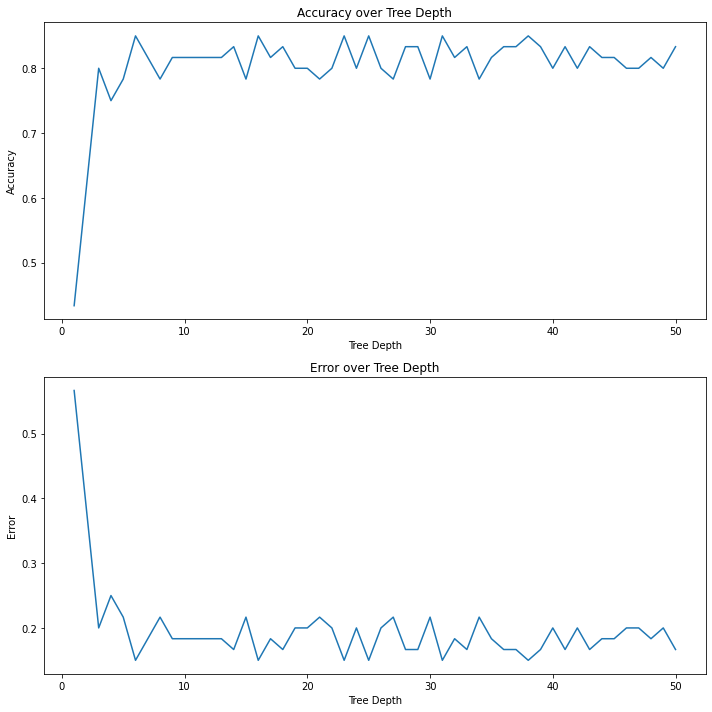

In [17]:
# Decision Tree - Plot Error and Accuacy

# Initialise variables
max_depth = 50
accuracies = []
errors = []

# Iteratively train the decision tree with increasing depth
for depth in range(1, max_depth + 1):
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train, y_train)
    
    dt_predictions = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)
    dt_error = 1 - dt_accuracy
    
    accuracies.append(dt_accuracy)
    errors.append(dt_error)

# Plot Accuracy and Error over increasing tree depth
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(range(1, max_depth + 1), accuracies)
axs[0].set_title('Accuracy over Tree Depth')
axs[0].set_xlabel('Tree Depth')
axs[0].set_ylabel('Accuracy')

axs[1].plot(range(1, max_depth + 1), errors)
axs[1].set_title('Error over Tree Depth')
axs[1].set_xlabel('Tree Depth')
axs[1].set_ylabel('Error')

plt.tight_layout()

#Saving the plot into plots folder
# Get the title of the current axes
title = plt.gca().get_title()
# Replace spaces with underscores and remove special characters if any
safe_title = "".join(c if c.isalnum() else "_" for c in title)
# Save the figure with the title as the filename
plt.savefig(f'../3_plots/d_classification/{safe_title}.png')

plt.show()


In [ ]:

# Train the decision tree
dt_classifier = DecisionTreeClassifier(max_depth=5)  # Example with max_depth set to 3 for simplicity
dt_classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10),dpi=300)
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=str(dt_classifier.classes_), rounded=True)

#Saving the plot into plots folder
# Get the title of the current axes
title = plt.gca().get_title()
# Replace spaces with underscores and remove special characters if any
safe_title = "".join(c if c.isalnum() else "_" for c in title)
# Save the figure with the title as the filename
plt.savefig(f'../3_plots/d_classification/{safe_title}.png')

plt.show()

In [19]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_error = 1 - rf_accuracy

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Error: {rf_error:.4f}")
table['Random Forest'] = {"Accuracy":rf_accuracy, "Error": rf_error   }

Random Forest Accuracy: 0.9667
Random Forest Error: 0.0333


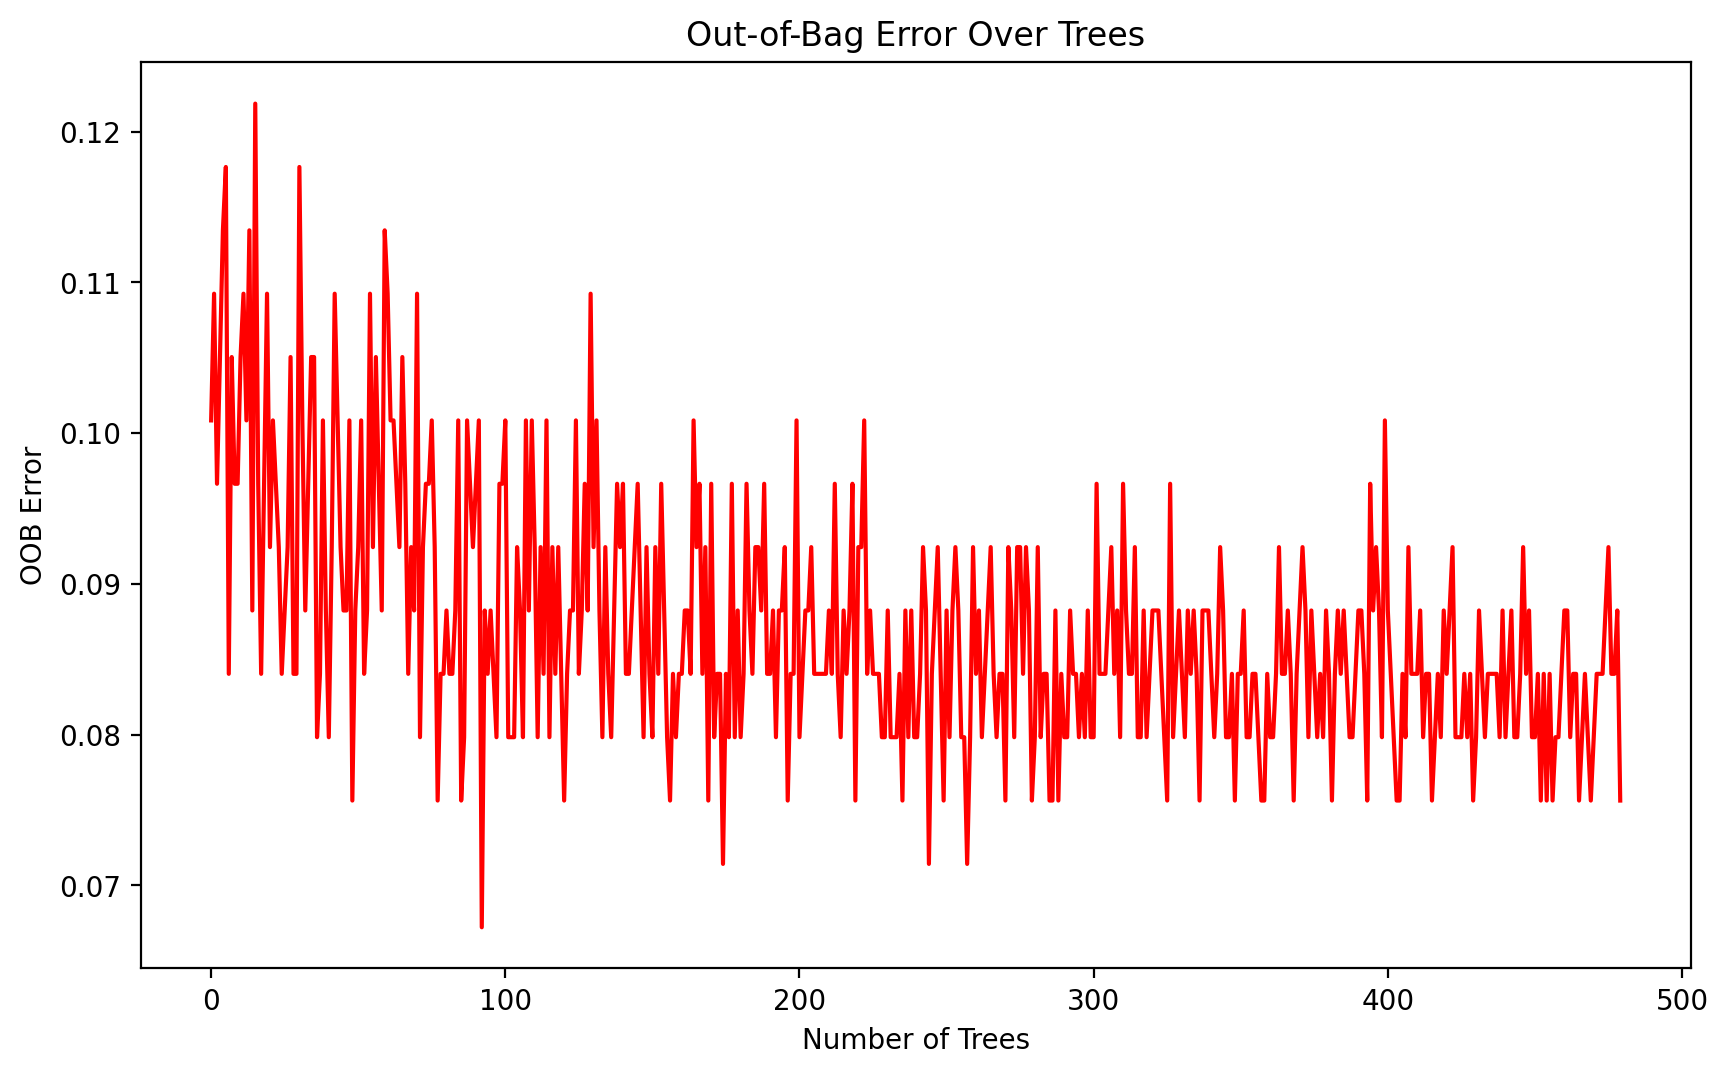

In [20]:
### Visualising random forest output

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# convergence

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize a Random Forest with out-of-bag samples enabled
rf_classifier = RandomForestClassifier(oob_score=True, n_estimators=500)
errors = []


for i in range(20, 500):
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(X_train, y_train)
    if i >= 20:  
        oob_error = 1 - rf_classifier.oob_score_
        errors.append(oob_error)    
    
    
# Plot the OOB error
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(errors, '-r')
plt.title('Out-of-Bag Error Over Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')

#Saving the plot into plots folder
# Get the title of the current axes
title = plt.gca().get_title()
# Replace spaces with underscores and remove special characters if any
safe_title = "".join(c if c.isalnum() else "_" for c in title)
# Save the figure with the title as the filename
plt.savefig(f'../3_plots/d_classification/{safe_title}.png')

plt.show()

In [21]:
# Initialise the Zero Rate classifier
zero_rate_classifier = DummyClassifier(strategy="most_frequent")

# List of base estimators
estimators = [
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('zr', zero_rate_classifier)
]

# Initialise and fit the Stacking classifier
stack_classifier = StackingClassifier(estimators=estimators, final_estimator=zero_rate_classifier)
stack_classifier.fit(X_train, y_train)

# Predict and calculate metrics
stack_predictions = stack_classifier.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_predictions)
stack_error = 1 - stack_accuracy

print(f"Stacked Generalization Accuracy: {stack_accuracy:.4f}")
print(f"Stacked Generalization Error: {stack_error:.4f}")

# Update the result table
table = {}  # Assuming 'table' is a dictionary for storing results
table['Stack Classifier'] = {"Accuracy": stack_accuracy, "Error": stack_error}

Stacked Generalization Accuracy: 0.2167
Stacked Generalization Error: 0.7833


In [22]:
#XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_error = 1 - xgb_accuracy

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Error: {xgb_error:.4f}")
table['XGBoost'] = {"Accuracy":xgb_accuracy, "Error": xgb_error   }

[17:38:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.9833
XGBoost Error: 0.0167


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [23]:
# Initialise the classifier
xgb_classifier = xgb.XGBClassifier()

# Empty dictionary to hold evaluation results
evals_result = {}

# Fitting the model
xgb_classifier.fit(
    X_train, y_train,
    eval_metric="mlogloss",  # Multi-logloss for multi-class classification
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

# Retrieve evaluation results from the trained model
evals_result = xgb_classifier.evals_result()

# Prediction
xgb_predictions = xgb_classifier.predict(X_test)

# Computing accuracy and error
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_error = 1 - xgb_accuracy

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Error: {xgb_error:.4f}")

[0]	validation_0-mlogloss:1.05149	validation_1-mlogloss:1.10970
[1]	validation_0-mlogloss:0.75814	validation_1-mlogloss:0.86061
[2]	validation_0-mlogloss:0.56460	validation_1-mlogloss:0.68939
[3]	validation_0-mlogloss:0.42758	validation_1-mlogloss:0.56871
[4]	validation_0-mlogloss:0.32999	validation_1-mlogloss:0.47734
[5]	validation_0-mlogloss:0.25823	validation_1-mlogloss:0.41057
[6]	validation_0-mlogloss:0.20560	validation_1-mlogloss:0.35081
[7]	validation_0-mlogloss:0.16650	validation_1-mlogloss:0.29926
[8]	validation_0-mlogloss:0.13725	validation_1-mlogloss:0.25797
[9]	validation_0-mlogloss:0.11489	validation_1-mlogloss:0.22648
[10]	validation_0-mlogloss:0.09747	validation_1-mlogloss:0.20309
[11]	validation_0-mlogloss:0.08339	validation_1-mlogloss:0.18526
[12]	validation_0-mlogloss:0.07253	validation_1-mlogloss:0.17427
[13]	validation_0-mlogloss:0.06373	validation_1-mlogloss:0.16466
[14]	validation_0-mlogloss:0.05680	validation_1-mlogloss:0.15655
[15]	validation_0-mlogloss:0.05117	

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-mlogloss:0.01963	validation_1-mlogloss:0.07196
[44]	validation_0-mlogloss:0.01939	validation_1-mlogloss:0.07143
[45]	validation_0-mlogloss:0.01917	validation_1-mlogloss:0.07092
[46]	validation_0-mlogloss:0.01894	validation_1-mlogloss:0.07063
[47]	validation_0-mlogloss:0.01875	validation_1-mlogloss:0.06940
[48]	validation_0-mlogloss:0.01853	validation_1-mlogloss:0.06891
[49]	validation_0-mlogloss:0.01836	validation_1-mlogloss:0.06878
[50]	validation_0-mlogloss:0.01819	validation_1-mlogloss:0.06883
[51]	validation_0-mlogloss:0.01804	validation_1-mlogloss:0.06869
[52]	validation_0-mlogloss:0.01784	validation_1-mlogloss:0.06838
[53]	validation_0-mlogloss:0.01766	validation_1-mlogloss:0.06834
[54]	validation_0-mlogloss:0.01753	validation_1-mlogloss:0.06776
[55]	validation_0-mlogloss:0.01738	validation_1-mlogloss:0.06780
[56]	validation_0-mlogloss:0.01724	validation_1-mlogloss:0.06760
[57]	validation_0-mlogloss:0.01710	validation_1-mlogloss:0.06751
[58]	validation_0-mloglos

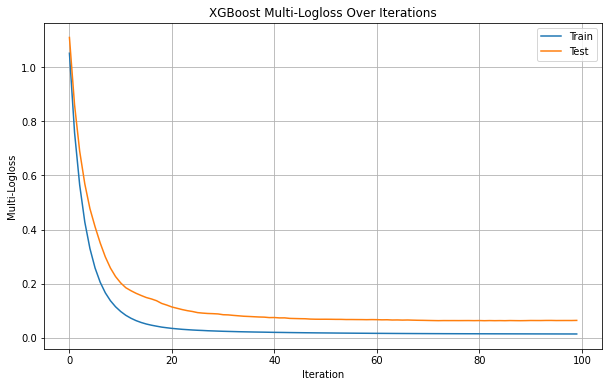

In [24]:
# Plot XGBoost logloss

# Extracting the evaluation results for each iteration
train_mlogloss = evals_result['validation_0']['mlogloss']
test_mlogloss = evals_result['validation_1']['mlogloss']

# Creating a range of iteration numbers
iterations = range(len(train_mlogloss))

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_mlogloss, label='Train')
plt.plot(iterations, test_mlogloss, label='Test')
plt.xlabel('Iteration')
plt.ylabel('Multi-Logloss')
plt.title('XGBoost Multi-Logloss Over Iterations')
plt.legend()
plt.grid(True)

#Saving the plot into plots folder
# Get the title of the current axes
title = plt.gca().get_title()
# Replace spaces with underscores and remove special characters if any
safe_title = "".join(c if c.isalnum() else "_" for c in title)
# Save the figure with the title as the filename
plt.savefig(f'../3_plots/d_classification/{safe_title}.png')

plt.show()


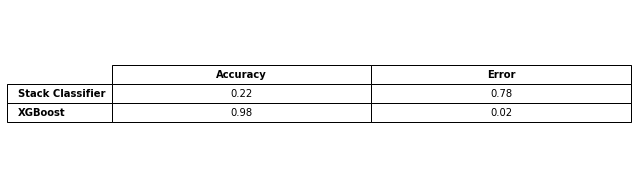

In [25]:
# Print out table comparing accuracies

df_save = pd.DataFrame(table).transpose().round(2)#.to_csv("../4_results/accuracy.csv")

# Create the figure and the line axis

fig, ax = plt.subplots(figsize=(12, 4)) # Set figsize to make room for long column names

# Hide axes
ax.axis('off')

# Add a table at the bottom of the axes
the_table = ax.table(cellText=df_save.values, 
                     colLabels=df_save.columns,
                     rowLabels=df_save.index,
                     cellLoc='center', 
                     loc='center')

# Scale the columns to fit the long names
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 2)  # You can set the x and y scale larger to fit the text

#adjusting column spacing
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

# Make column and row names bold
bold_font = FontProperties(weight='bold')
for (i, j), cell in the_table.get_celld().items():
    if i == 0:  # Column names
        cell.set_text_props(fontproperties=bold_font)
    if j == -1:  # Row names
        cell.set_text_props(fontproperties=bold_font)
        
# Save as a png file
plt.savefig("../4_results/df_with_index_and_columns_adjusted.png", bbox_inches='tight', pad_inches=0.03)

In [26]:
# Explore data

# Print to screen
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   osm_id        3426 non-null   int64  
 1   ncc_owned     3426 non-null   int64  
 2   osm_way_id    3426 non-null   int64  
 3   house_area    3426 non-null   int64  
 4   house_peri    3426 non-null   int64  
 5   house_vert    3426 non-null   int64  
 6   private       3426 non-null   object 
 7   house_lati    3426 non-null   float64
 8   NATIONALCA    3426 non-null   float64
 9   land_area     3426 non-null   float64
 10  land_perim    3426 non-null   float64
 11  land_verti    3426 non-null   float64
 12  land_longi    3426 non-null   float64
 13  land_latit    3426 non-null   float64
 14  COUNT         3426 non-null   int64  
 15  house_long    3426 non-null   float64
 16  b2lpercent    3426 non-null   float64
 17  building_age  298 non-null    object 
dtypes: float64(9), int64(7), obj

In [27]:
# Select data where building_age is labelled
index=~data['building_age'].isna()

# Collect labelled buildings only & get index
labelled_data = data[index]

# Print to screen
labelled_data

osm_id  ncc_owned  osm_way_id  house_area  house_peri  house_vert  \
37     61738758          0    61738758          61          38           8   
88     61738934          0    61738934          53          31           8   
89     61738936          0    61738936          83          39           4   
97     61738958          0    61738958          40          32           6   
103    61738962          0    61738962          49          36           6   
...         ...        ...         ...         ...         ...         ...   
3363  815821956          1   815821956          43          27           4   
3364  815821957          1   815821957          38          25           4   
3416  866781899          1   866781899          50          30           6   
3417  866781900          1   866781900          49          29           7   
3418  970688350          1   970688350          45          27           4   

     private    house_lati  NATIONALCA  land_area  land_perim  land_verti  \
37        no  6.971471e+06  29393419.0       69.0        41.0        12.0   
88        no  6.971390e+06  29403117.0      127.0        50.0        12.0   
89        no  6.971303e+06  29399689.0      282.0        78.0        25.0   
97        no  6.972130e+06  29374681.0      102.0        60.0        14.0   
103       no  6.971576e+06  29370838.0      164.0        56.0        10.0   
...      ...           ...         ...        ...         ...         ...   
3363     yes  6.972389e+06  60841217.0      189.0        69.0        17.0   
3364     yes  6.972367e+06  60266631.0      126.0        58.0        14.0   
3416     yes  6.972128e+06  61301033.0      133.0        55.0        17.0   
3417     yes  6.972120e+06  61301008.0      137.0        51.0        12.0   
3418     yes  6.972354e+06  60175896.0      173.0        70.0        16.0   

       land_longi    land_latit  COUNT  house_long  b2lpercent  building_age  
37   -127468.5196  6.971467e+06      2  -127469.97        88.0        modern  
88   -127334.2561  6.971393e+06      2  -127334.47        42.0        modern  
89   -127391.7110  6.971309e+06      2  -127392.91        29.0        modern  
97   -127724.8765  6.972138e+06      2  -127723.61        39.0     victorian  
103  -127794.9319  6.971576e+06      1  -127789.88        30.0     victorian  
...           ...           ...    ...         ...         ...           ...  
3363 -127254.7223  6.972392e+06      4  -127256.05        23.0  21st_century  
3364 -127237.5003  6.972368e+06      5  -127237.20        30.0  21st_century  
3416 -127108.9538  6.972127e+06      5  -127106.98        38.0  21st_century  
3417 -127100.5090  6.972118e+06      5  -127099.87        36.0  21st_century  
3418 -127224.4215  6.972355e+06      4  -127227.02        26.0  21st_century  

[298 rows x 18 columns]

In [28]:
# Encoding building_age

encoder = LabelEncoder()
labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_97913/2600345026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])


In [29]:
X_train

land_area  land_perim  land_verti   land_longi    land_latit  \
214        89.0        49.0         8.0 -127755.4703  6.971719e+06   
1925      126.0        54.0        10.0 -128235.3378  6.972768e+06   
1858      104.0        48.0        11.0 -127563.9569  6.971969e+06   
1677       85.0        48.0        13.0 -127672.1074  6.971726e+06   
372       165.0        60.0        11.0 -128332.3513  6.972577e+06   
...         ...         ...         ...          ...           ...   
2002      124.0        48.0         9.0 -127184.8594  6.971829e+06   
558        91.0        57.0        18.0 -127400.9953  6.971460e+06   
1150      134.0        46.0        14.0 -127437.7914  6.972337e+06   
2741      172.0        60.0        17.0 -126955.7320  6.971175e+06   
980       229.0        67.0         8.0 -127238.4111  6.972169e+06   

      house_area  house_peri  house_vert  house_long    house_lati  b2lpercent  
214           56          39           6  -127761.01  6.971715e+06        63.0  
1925          27          21           4  -128239.03  6.972766e+06        21.0  
1858          70          40           6  -127564.17  6.971974e+06        67.0  
1677          34          26           4  -127677.33  6.971723e+06        40.0  
372           39          26           4  -128331.07  6.972576e+06        24.0  
...          ...         ...         ...         ...           ...         ...  
2002          36          24           4  -127188.39  6.971830e+06        29.0  
558           33          24           4  -127402.03  6.971452e+06        36.0  
1150          58          33           8  -127439.37  6.972341e+06        43.0  
2741          90          41           5  -126958.62  6.971174e+06        52.0  
980           55          30           4  -127239.97  6.972166e+06        24.0  

[238 rows x 11 columns]

In [30]:
# Comparison of all models

In [31]:
# Train Models and Collect Metrics:

def get_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    avg_f1 = f1_score(y_true, y_pred, average='macro')
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    return precision, recall, f1, accuracy, avg_f1, rmse, r2

In [32]:
# Define, train models, and collect metrics:

models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    "Zero Rate Classifer": zero_rate_classifier,
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()),
    "XGBoost": xgb.XGBClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision, recall, f1, accuracy, avg_f1, rmse, r2 = get_metrics(y_test, predictions)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'R-Squared': r2,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1-score': f1,
        'Avg F1-score': avg_f1,
    })

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[17:38:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [33]:
# Display Results:
df_results = pd.DataFrame(results)
df_results

# Display the DataFrame without index
display(HTML(df_results.to_html(index=False)))

In [34]:
# Define and Train Models:

models = {
    "Zero Rate Classifer": zero_rate_classifier,
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()),
    "XGBoost": xgb.XGBClassifier(eval_metric='merror')
}

confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    confusion_matrices[name] = cm

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [35]:
# Initialize the Zero Rate classifier
zero_rate_classifier = DummyClassifier(strategy="most_frequent")

model_names = ["Zero Rate Classifier", "Decision Tree", "Random Forest", "Stacking Classifier", "XGBoost"]

models = [
    zero_rate_classifier,
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=zero_rate_classifier), 
    xgb.XGBClassifier()
]

In [36]:
# more visual table

data_for_table = []

for name, matrix in confusion_matrices.items():
    flat_matrix = matrix.flatten()
    row_data = {"Model": name}
    for i, value in enumerate(flat_matrix):
        row_data[f"Value_{i+1}"] = value
    data_for_table.append(row_data)

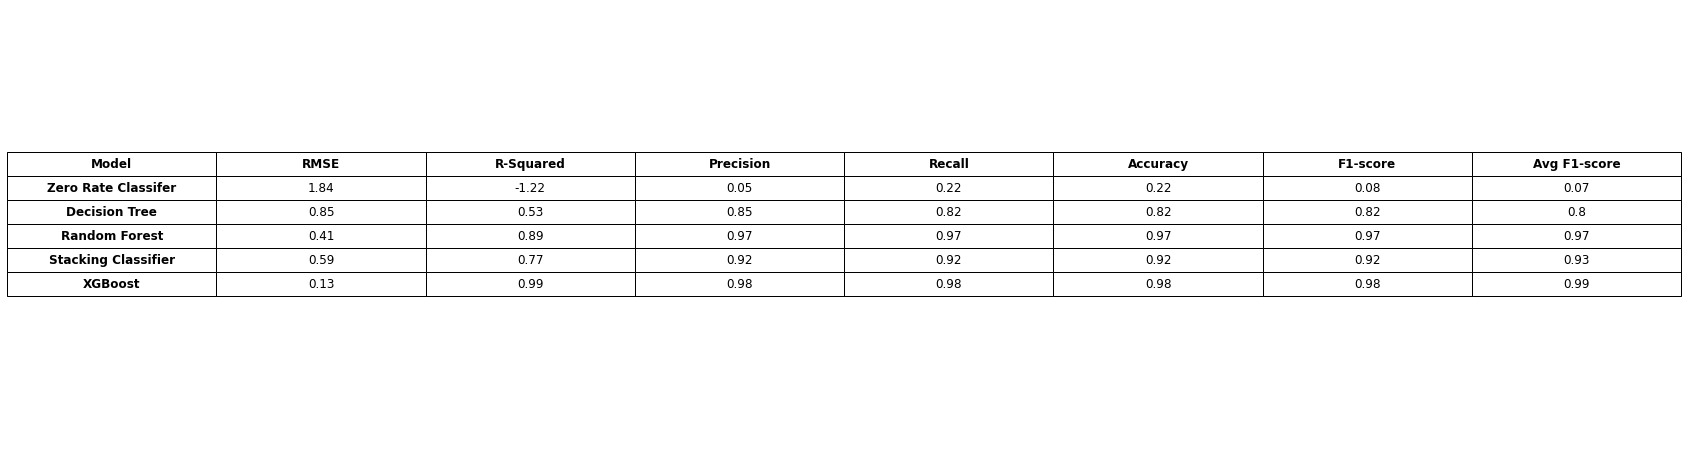

In [37]:
# Round numerical columns to 2 decimal places
cols_to_round = [col for col in df_results.columns if col != "Model"]
df_results[cols_to_round] = df_results[cols_to_round].applymap(lambda x: round(x, 2))

# Create a new figure and set a larger size
fig, ax = plt.subplots(figsize=(15, 8))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create Table and set its location
table = ax.table(cellText=df_results.values,
                 colLabels=df_results.columns,
                 cellLoc='center', loc='center')

# Make cells larger to fit text
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.0, 2.0)

# Make the headings and first column bold
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:  # Changed this line to also bold the first column
        cell.set_text_props(fontweight='bold')

# Define the directory path
directory_path = '../4_results/'

# Check if the directory exists
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the table as a PNG file
fig.savefig(f'{directory_path}results_table.png', bbox_inches='tight')

# Show the table
plt.show()

# Close the plot to free resources
plt.close()

In [38]:
# rows for each model

data_for_table = []

for name, matrix in confusion_matrices.items():
    flat_matrix = matrix.flatten()
    row_data = {
        "Model": name,
        "True_Negative": flat_matrix[0],
        "False_Positive": flat_matrix[1],
        "False_Negative": flat_matrix[2],
        "True_Positive": flat_matrix[3]
    }
    data_for_table.append(row_data)

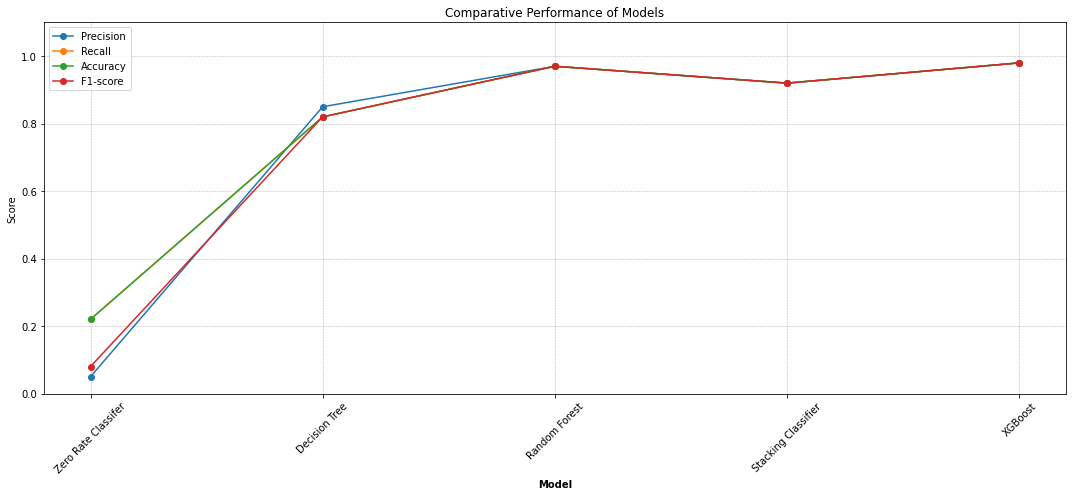

In [39]:
# Define metrics and models
metrics = ['Precision', 'Recall', 'Accuracy', 'F1-score']
models = df_results['Model'].tolist()

plt.figure(figsize=(15, 7))

# For each metric, plot a line for each model
for metric in metrics:
    plt.plot(models, df_results[metric], marker='o', label=metric)

plt.xlabel('Model', fontweight='bold')
plt.xticks(models, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Assuming scores range from 0 to 1
plt.title('Comparative Performance of Models')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Create legend & Show graphic
plt.legend()

#Saving the plot into plots folder
# Get the title of the current axes
title = plt.gca().get_title()
# Replace spaces with underscores and remove special characters if any
safe_title = "".join(c if c.isalnum() else "_" for c in title)
# Save the figure with the title as the filename
plt.savefig(f'../3_plots/d_classification/{safe_title}.png')

plt.show()